Index(['Charged Off', 'Current', 'Does not meet the credit policy',
       'Fully Paid', 'Late', 'Unknown'],
      dtype='object')
0    1
1    1
2    1
3    3
4    1
Name: grade, dtype: int64
0    1
1    1
2    1
3    3
4    1
Name: grade, dtype: int64


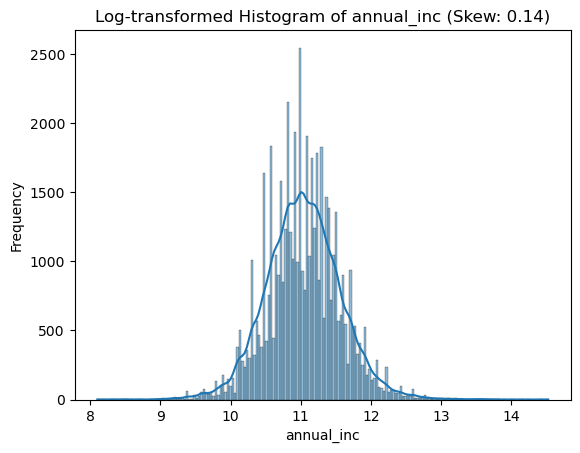

New skewness of annual_inc: 0.14


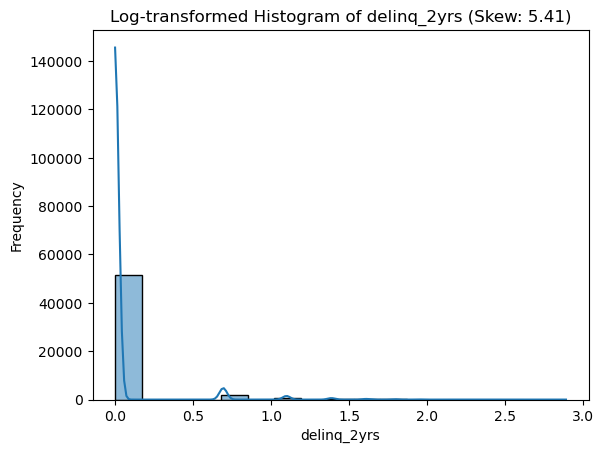

New skewness of delinq_2yrs: 5.41


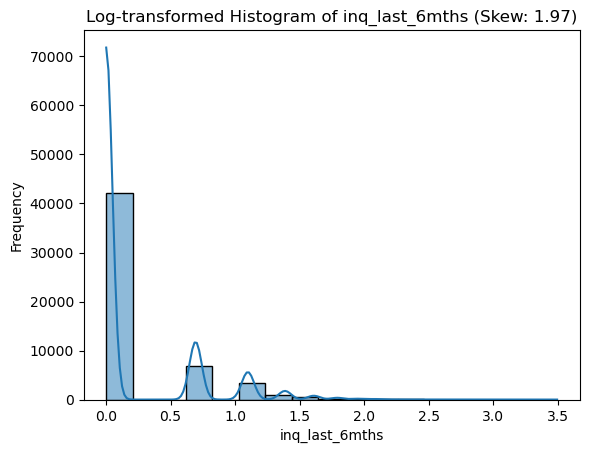

New skewness of inq_last_6mths: 1.97


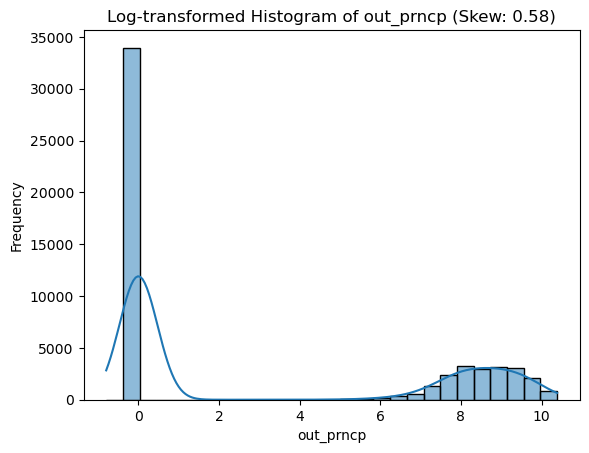

New skewness of out_prncp: 0.58


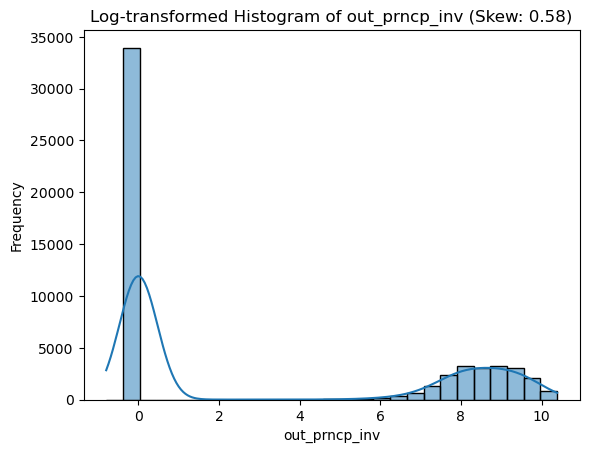

New skewness of out_prncp_inv: 0.58


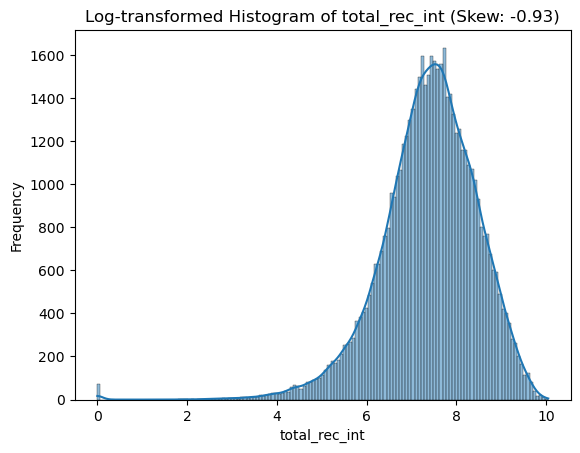

New skewness of total_rec_int: -0.93


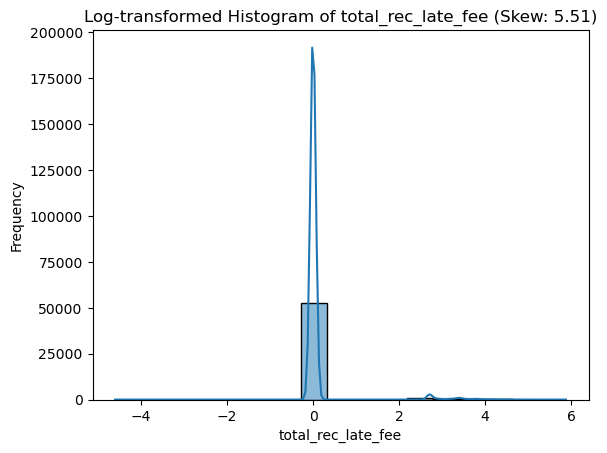

New skewness of total_rec_late_fee: 5.51


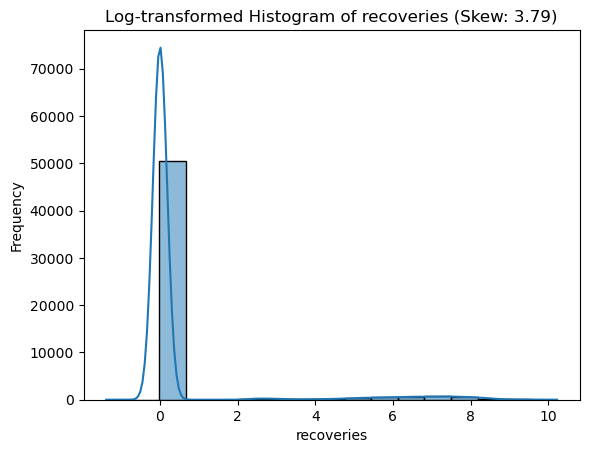

New skewness of recoveries: 3.79


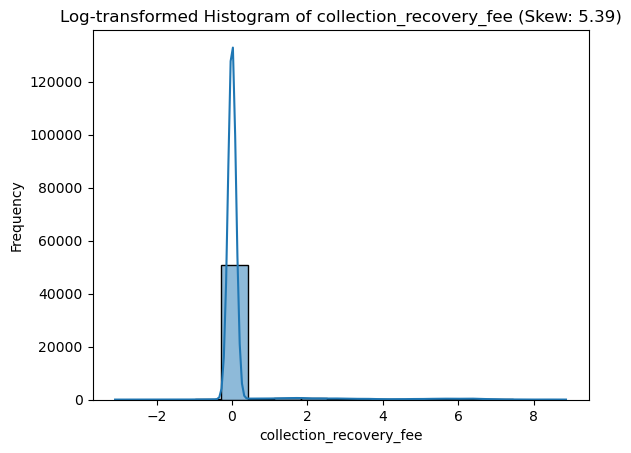

New skewness of collection_recovery_fee: 5.39


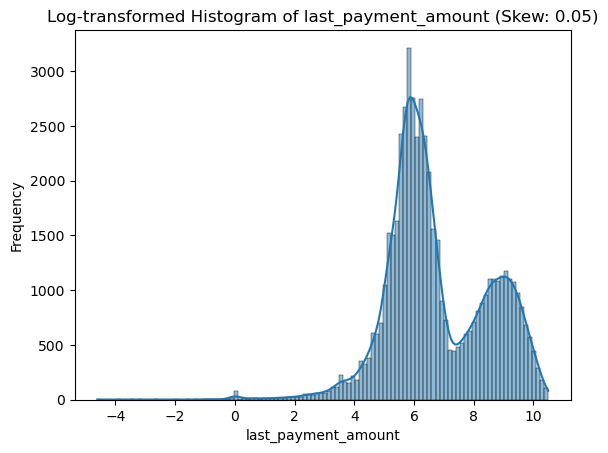

New skewness of last_payment_amount: 0.05
Applied Box-Cox transformation to 'loan_amount'.


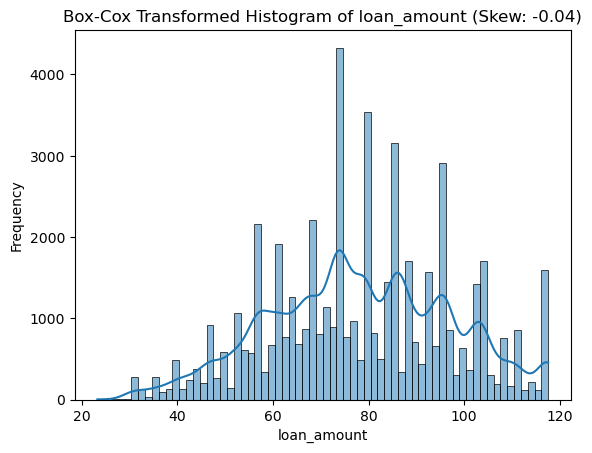

New skewness of loan_amount: -0.04
Applied Box-Cox transformation to 'funded_amount'.


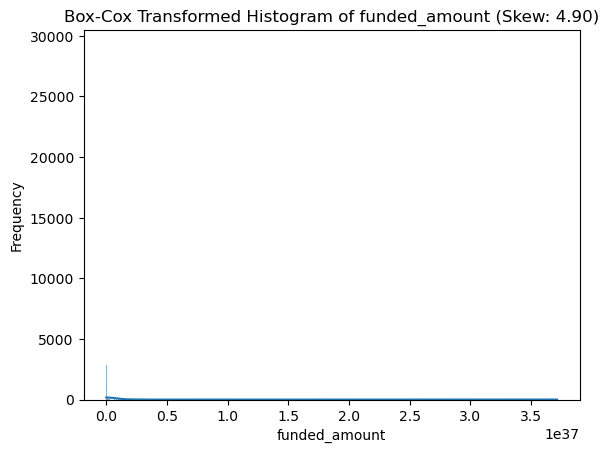

New skewness of funded_amount: 4.90
Adjusting 'funded_amount_inv' by adding 1.0 to make all values positive.
Applied Box-Cox transformation to 'funded_amount_inv'.


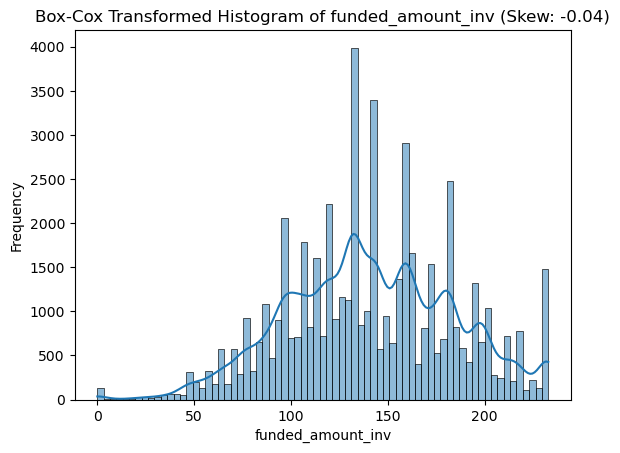

New skewness of funded_amount_inv: -0.04


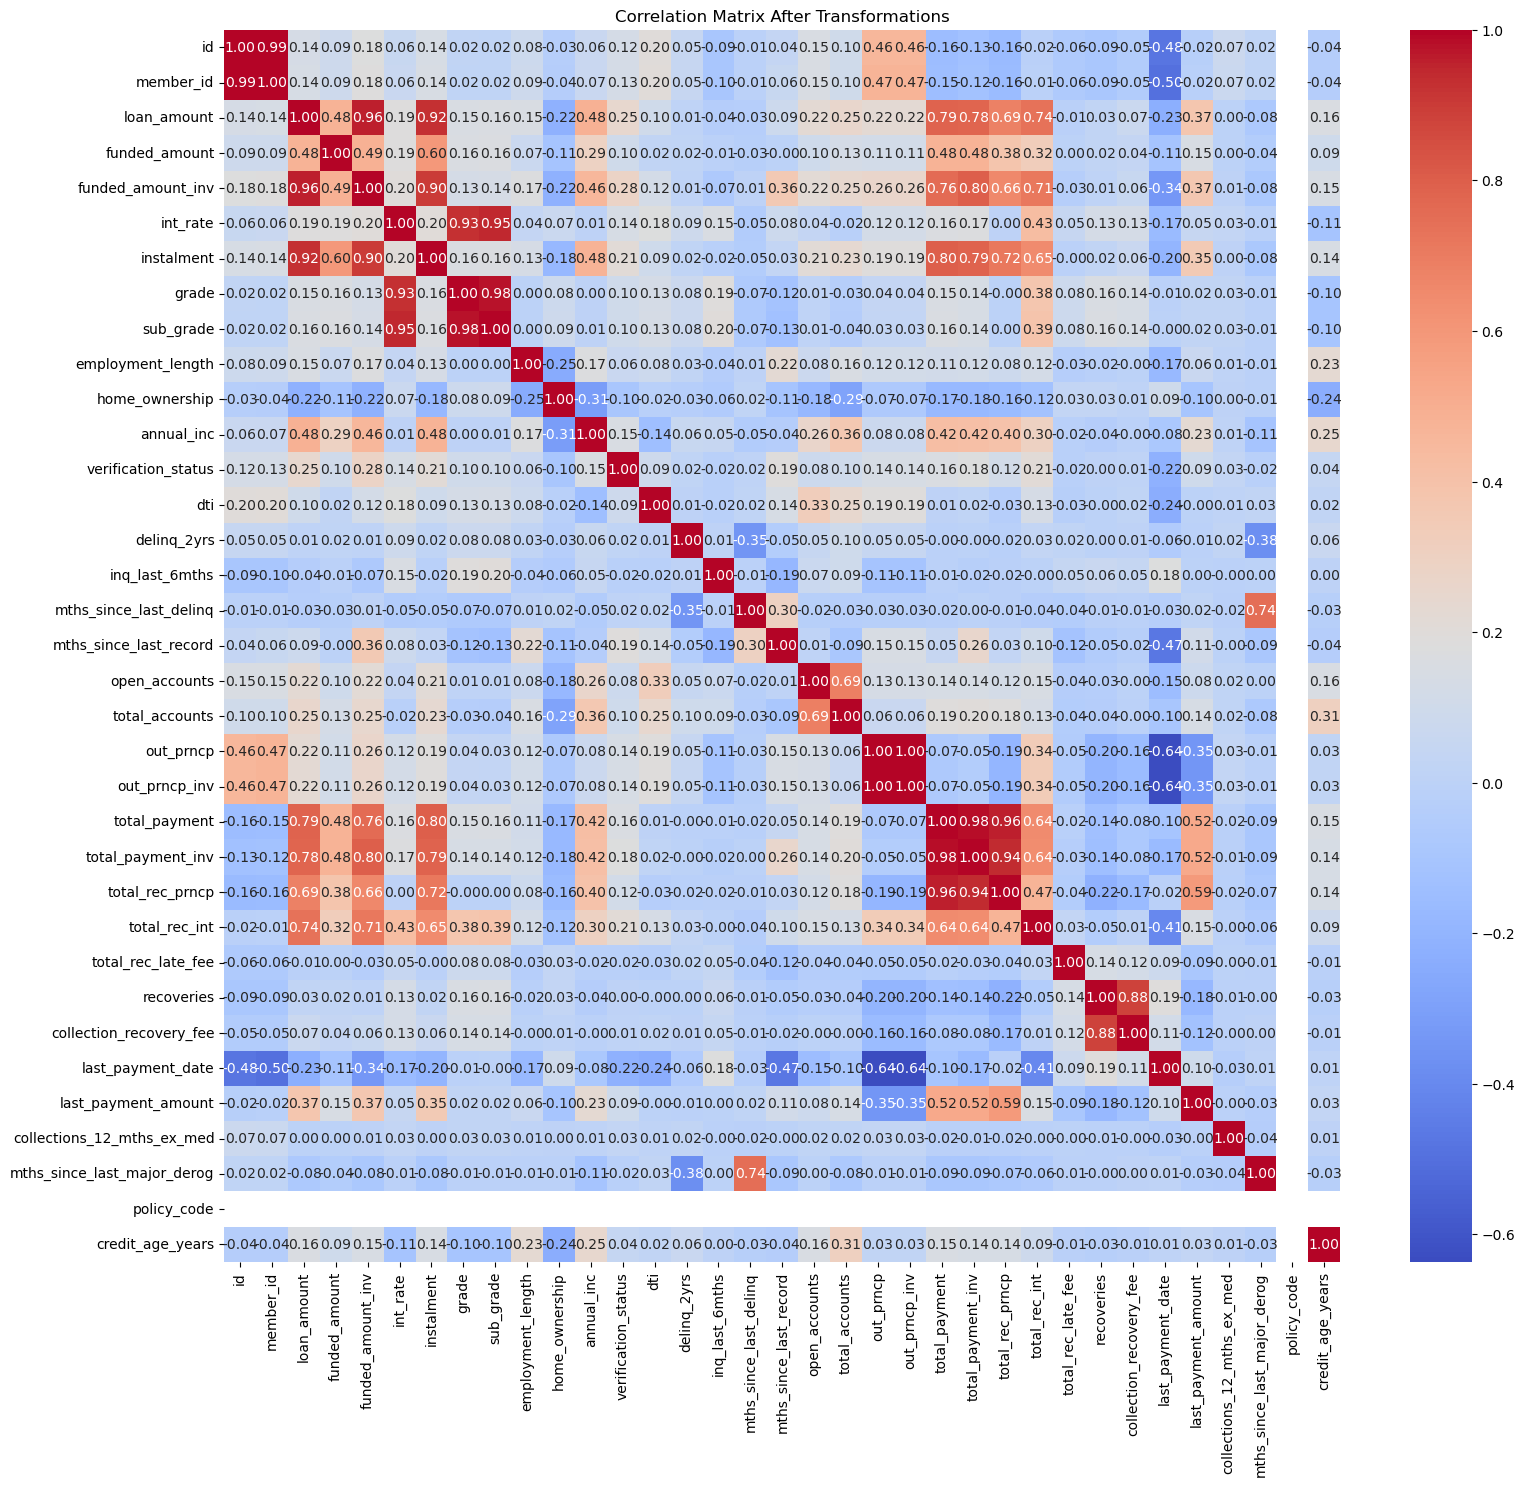

Severe Skewed Columns:


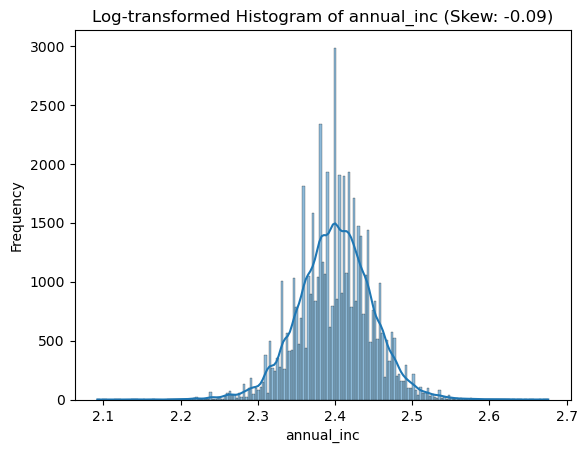

New skewness of annual_inc: -0.09


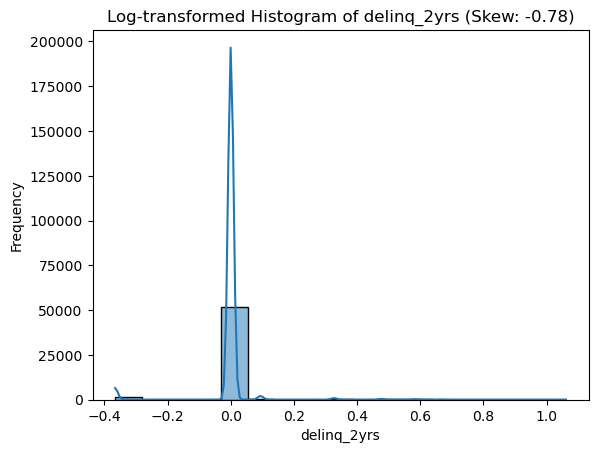

New skewness of delinq_2yrs: -0.78


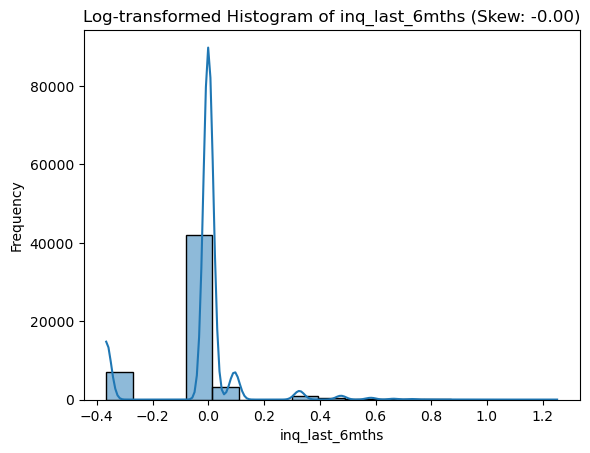

New skewness of inq_last_6mths: -0.00


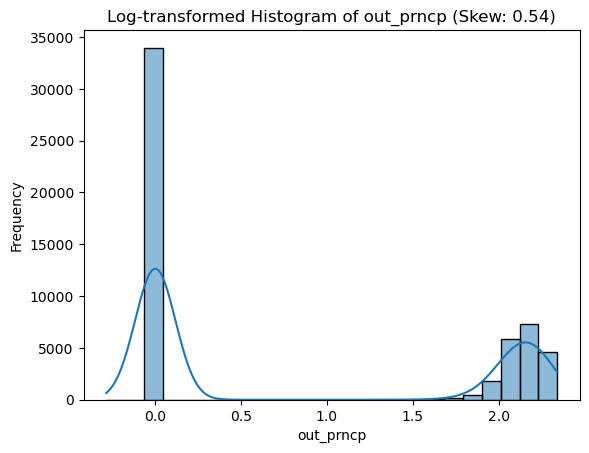

New skewness of out_prncp: 0.54


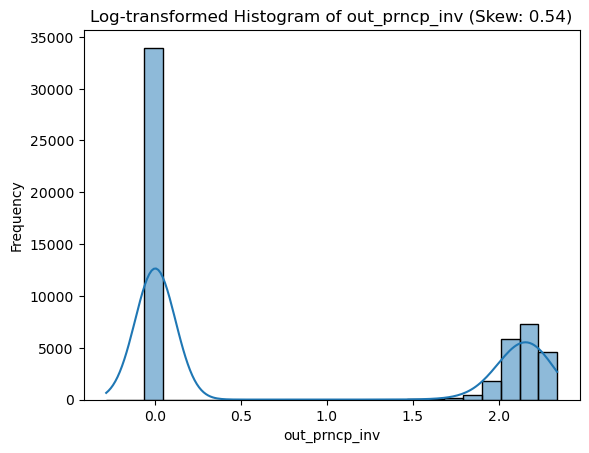

New skewness of out_prncp_inv: 0.54


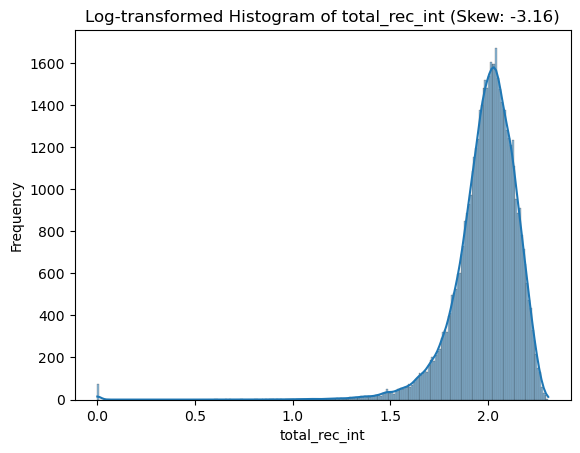

New skewness of total_rec_int: -3.16


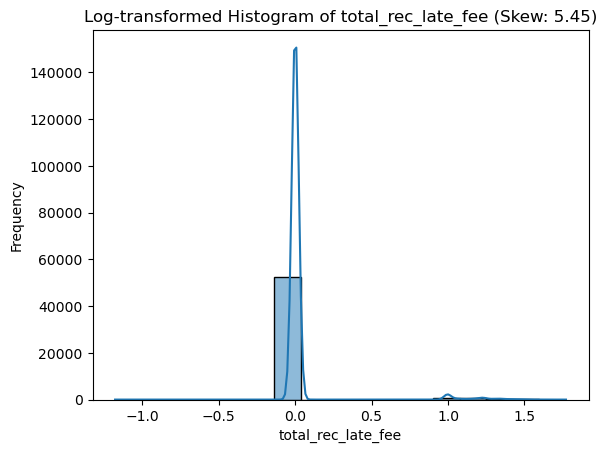

New skewness of total_rec_late_fee: 5.45


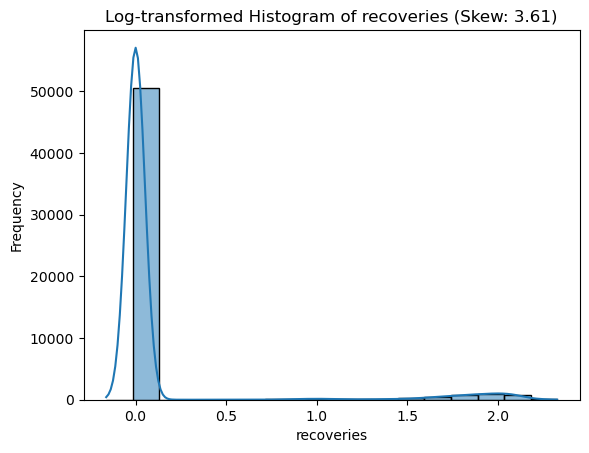

New skewness of recoveries: 3.61


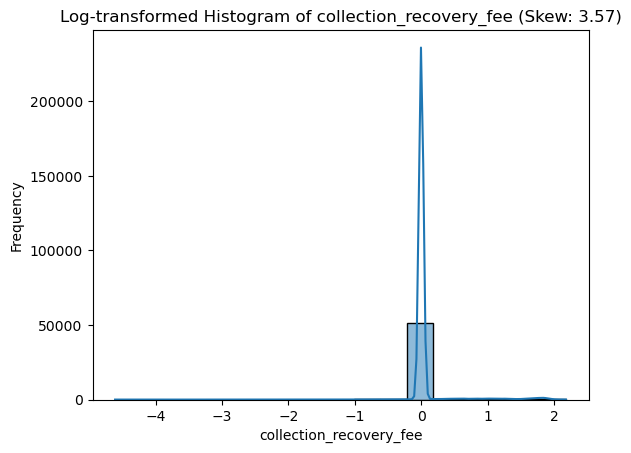

New skewness of collection_recovery_fee: 3.57


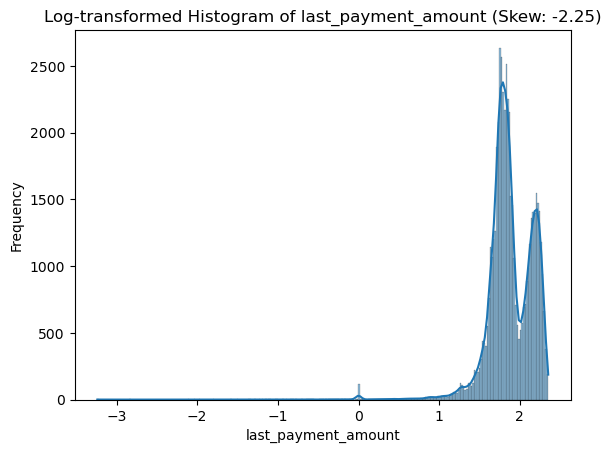

New skewness of last_payment_amount: -2.25

Moderate Skewed Columns:
Applied Box-Cox transformation to 'loan_amount'.


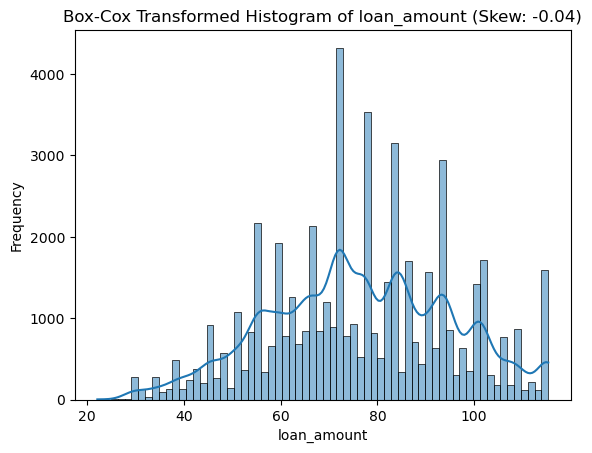

New skewness of loan_amount: -0.04
Applied Box-Cox transformation to 'funded_amount'.


/Users/charliesmith/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:922: RuntimeWarning: overflow encountered in power
  variance = np.var(data**lmb / lmb, axis=0)


ValueError: array must not contain infs or NaNs

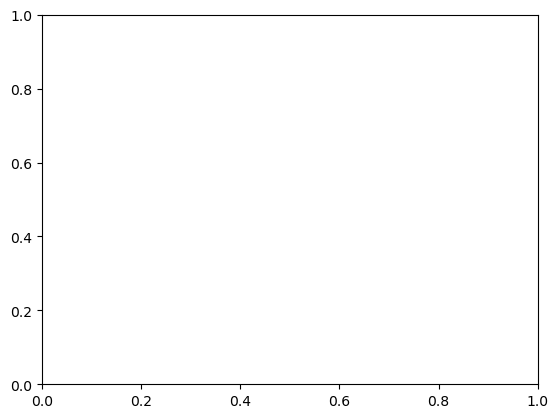

In [2]:
# Import necessary libraries
import pandas as pd
import importlib
import data_cleaning
import data_analysis
import matplotlib.pyplot as plt
import seaborn as sns
from data_cleaning import DataTransform
from data_analysis import DataFrameTransform
from scipy.stats import boxcox

# Reload the modules
importlib.reload(data_cleaning)
importlib.reload(data_analysis)

# Read the data
data_frame = pd.read_csv('loan_payments.csv')

# Step 1: Clean and transform the data
# Create an instance of the DataTransform class
transformer = DataTransform(data_frame)

# Apply the conversion methods to clean the data
data_frame = transformer.convert_sub_grade()
data_frame = transformer.convert_grade()
data_frame = transformer.convert_employment_length()
data_frame = transformer.convert_home_ownership()
data_frame = transformer.convert_issue_date()
data_frame = transformer.convert_last_payment_date()
data_frame = transformer.convert_last_credit_pull_date()
data_frame = transformer.convert_verification_status()
data_frame = transformer.convert_earliest_credit_line()

# Step 2: Analyze the data for skewness and transformations
# Create an instance of DataFrameTransform with the cleaned DataFrame
df_transform = DataFrameTransform(data_frame)

# Apply log transformation to columns with severe skewness
df_transform.log_transform_severe_skew()

# Apply Box-Cox transformation to columns with moderate skewness
df_transform.box_cox_transform_moderate_skew()

# Step 3: Plot and review results
# Plot the correlation matrix after transformations
correlation_matrix = data_frame.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix After Transformations')
plt.show()

# Perform analysis using DataFrameTransform
analysis = DataFrameTransform(data_frame)

# Print severe skewed columns
print("Severe Skewed Columns:")
analysis.log_transform_severe_skew()

# Print moderate skewed columns
print("\nModerate Skewed Columns:")
analysis.box_cox_transform_moderate_skew()

In [5]:
# Import required modules
import pandas as pd
from data_cleaning import DataTransform
from data_analysis import Plotter, DataFrameTransform

# Load the dataset
data_frame = pd.read_csv('loan_payments.csv')

Applying log transformation to columns with severe skewness...


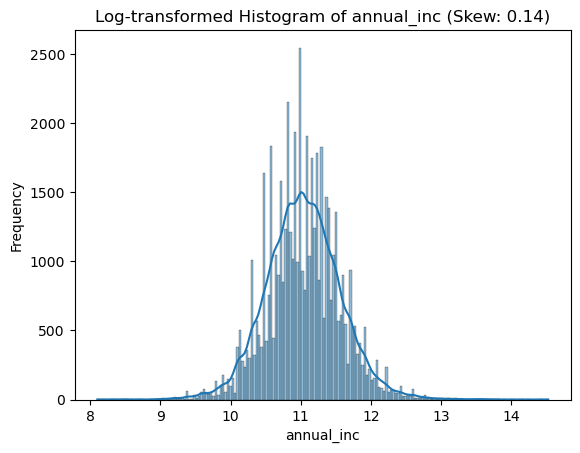

New skewness of annual_inc: 0.14


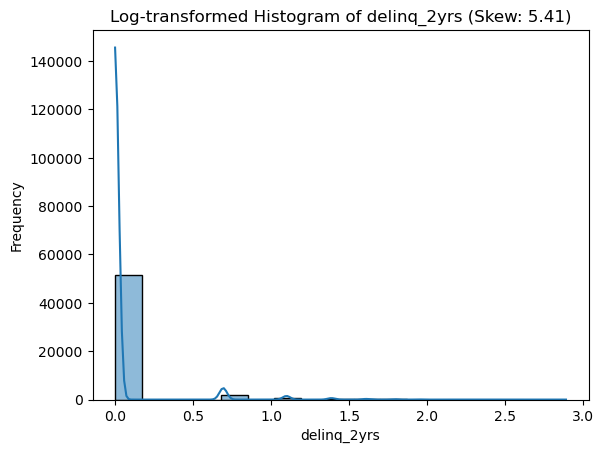

New skewness of delinq_2yrs: 5.41


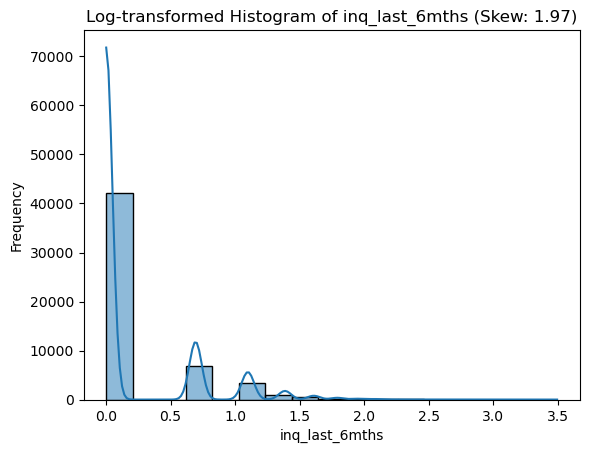

New skewness of inq_last_6mths: 1.97


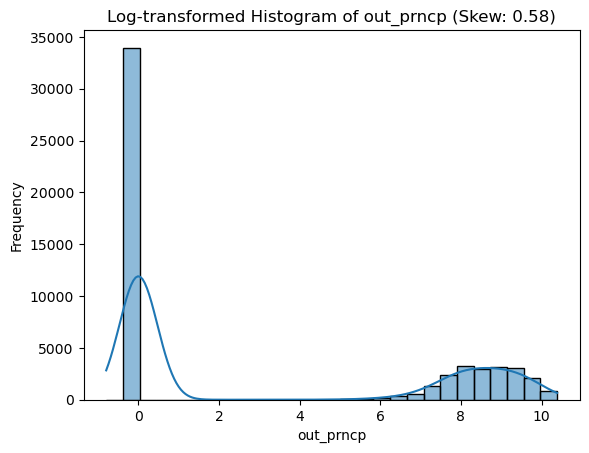

New skewness of out_prncp: 0.58


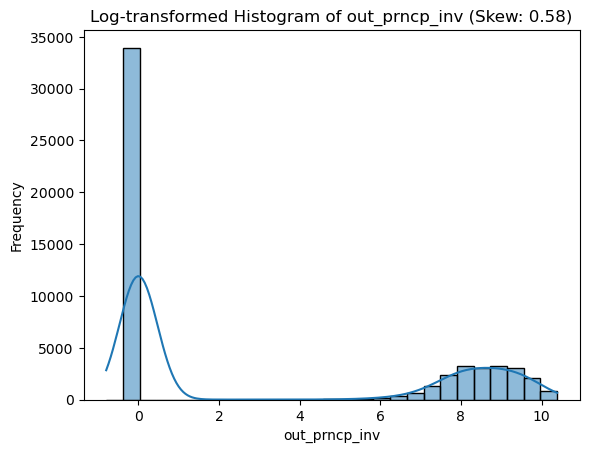

New skewness of out_prncp_inv: 0.58


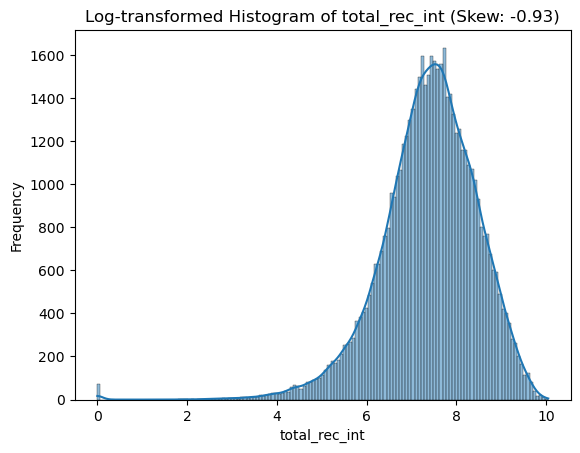

New skewness of total_rec_int: -0.93


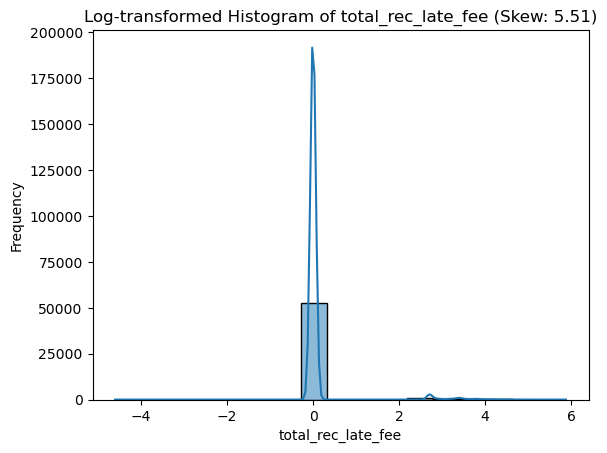

New skewness of total_rec_late_fee: 5.51


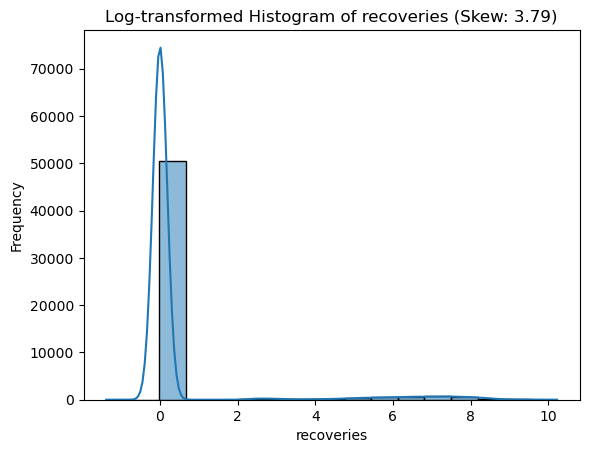

New skewness of recoveries: 3.79


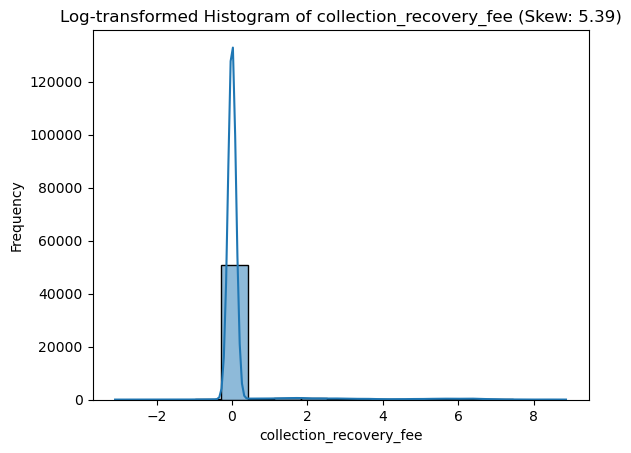

New skewness of collection_recovery_fee: 5.39


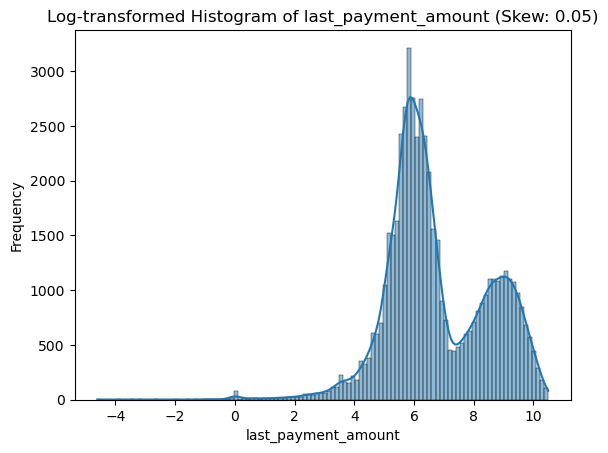

New skewness of last_payment_amount: 0.05
Applying Box-Cox transformation to columns with moderate skewness...
Applied Box-Cox transformation to 'loan_amount'.


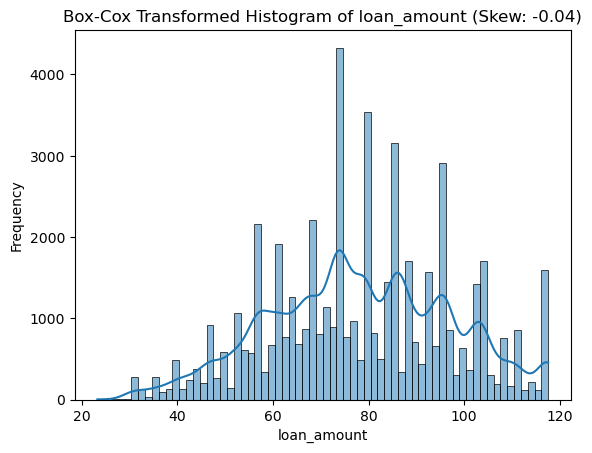

New skewness of loan_amount: -0.04
Applied Box-Cox transformation to 'funded_amount'.


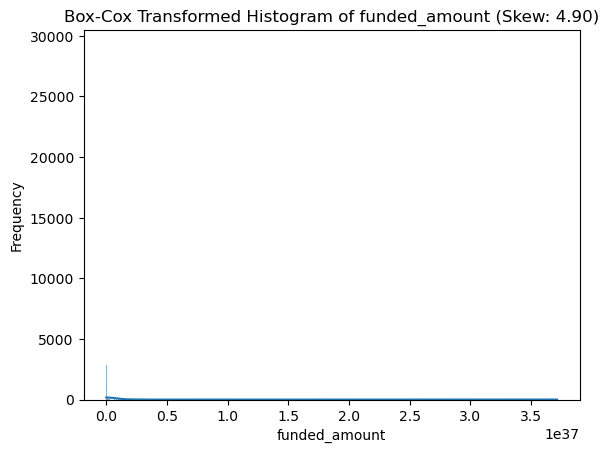

New skewness of funded_amount: 4.90
Adjusting 'funded_amount_inv' by adding 1.0 to make all values positive.
Applied Box-Cox transformation to 'funded_amount_inv'.


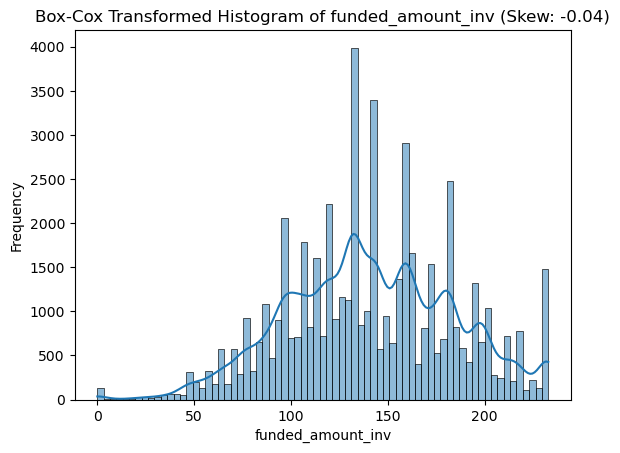

New skewness of funded_amount_inv: -0.04


In [6]:
# Initialize the transformation class
transformer = DataFrameTransform(data_frame)

# Apply log transformation for severe skewness
print("Applying log transformation to columns with severe skewness...")
transformer.log_transform_severe_skew()

# Apply Box-Cox transformation for moderate skewness
print("Applying Box-Cox transformation to columns with moderate skewness...")
transformer.box_cox_transform_moderate_skew()

Plotting histograms for specific columns...


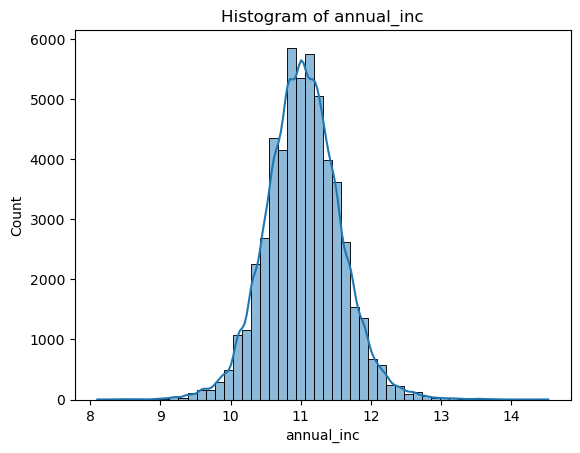

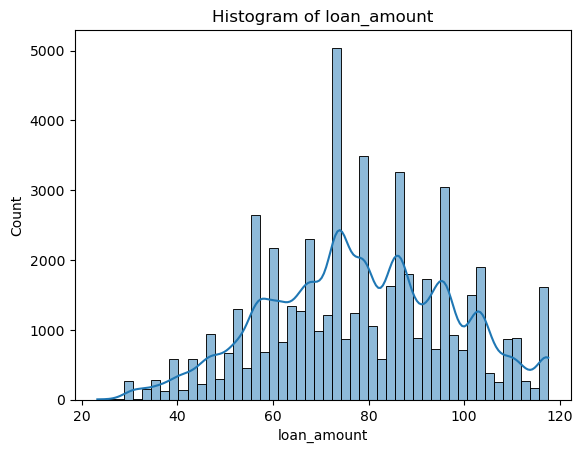

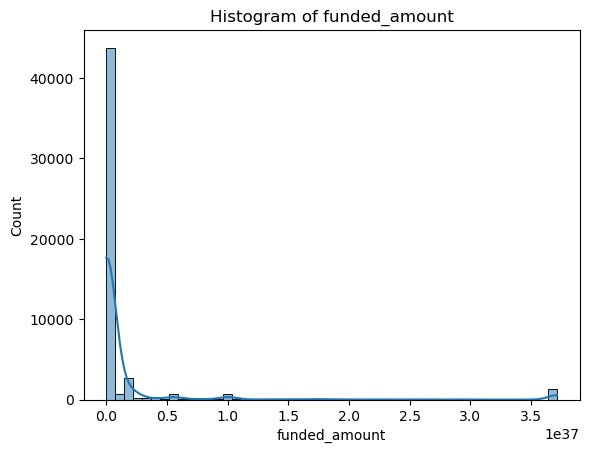

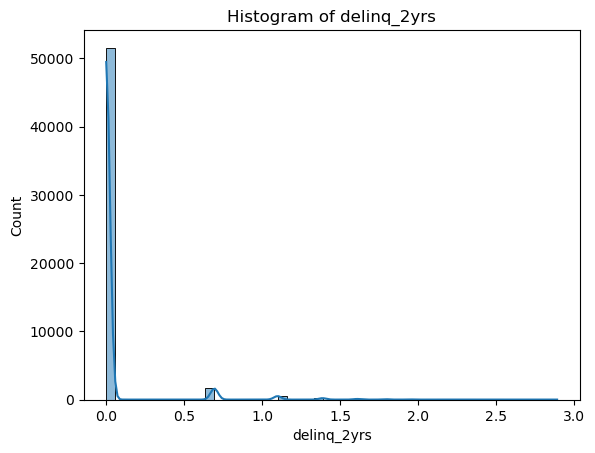

In [7]:
# Create an instance of the Plotter class with the updated DataFrame
plotter = Plotter(transformer.df)

# Plot histograms for specific columns to verify transformations
columns_to_plot = ['annual_inc', 'loan_amount', 'funded_amount', 'delinq_2yrs']
print("Plotting histograms for specific columns...")
for column in columns_to_plot:
    plotter.plot_histogram(column)

In [16]:
print("Plotting histograms for all numeric columns to check for outliers...")
plotter.plot_all_numeric_columns()

Plotting histograms for all numeric columns to check for outliers...


AttributeError: 'Plotter' object has no attribute 'plot_all_numeric_columns'

In [18]:
import importlib
import data_analysis  # Make sure the file is correctly imported
import pandas as pd

# Reload the module
importlib.reload(data_analysis)

# Create an instance of Plotter with your DataFrame
from data_analysis import Plotter
plotter = Plotter(data_frame)

In [19]:
print(dir(plotter))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'df', 'plot_all_numeric_columns', 'plot_histogram', 'plot_missing_values']


Plotting histograms for all numeric columns to check for outliers...
Plotting histogram for id


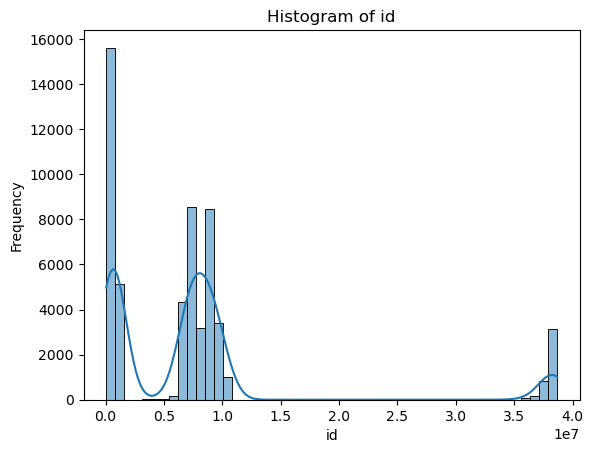

Plotting histogram for member_id


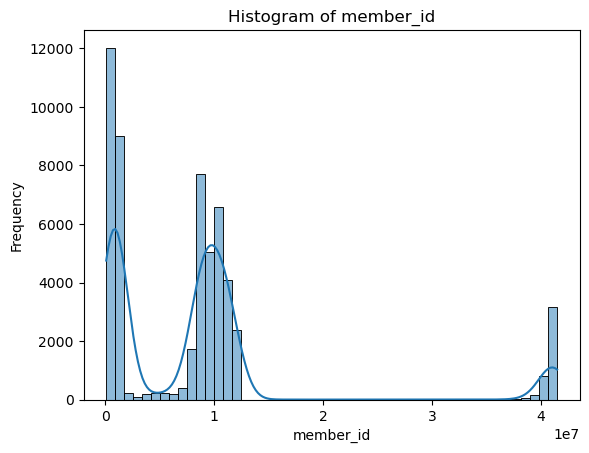

Plotting histogram for loan_amount


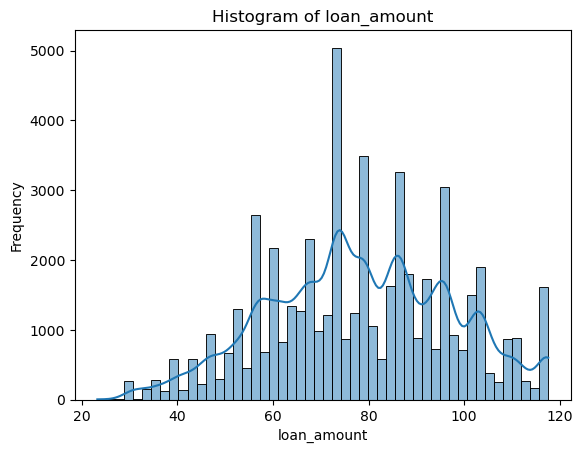

Plotting histogram for funded_amount


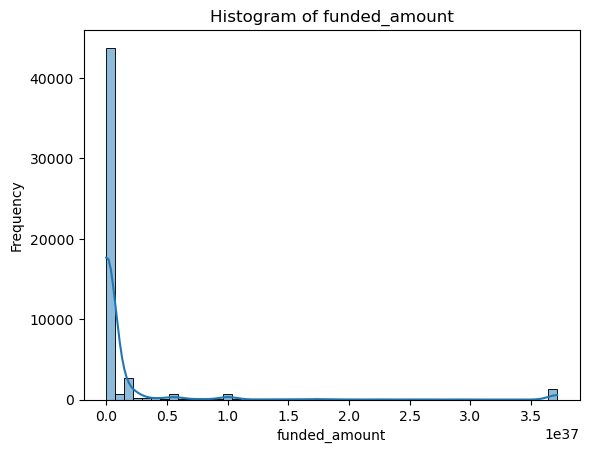

Plotting histogram for funded_amount_inv


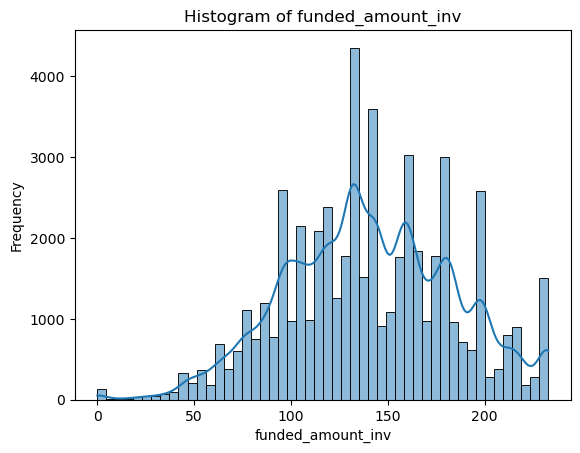

Plotting histogram for int_rate


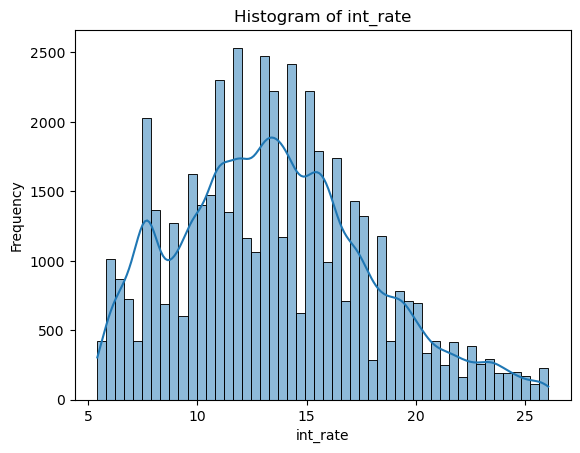

Plotting histogram for instalment


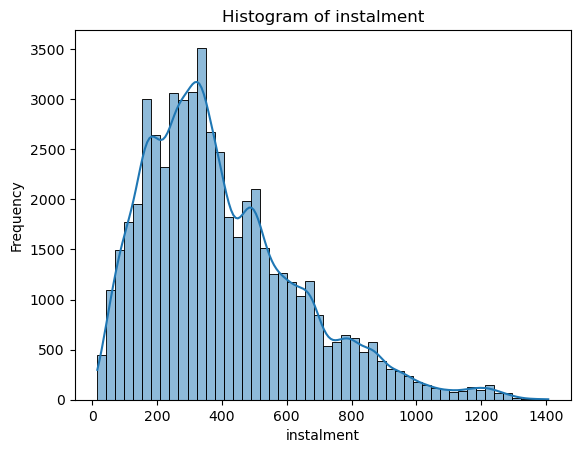

Plotting histogram for annual_inc


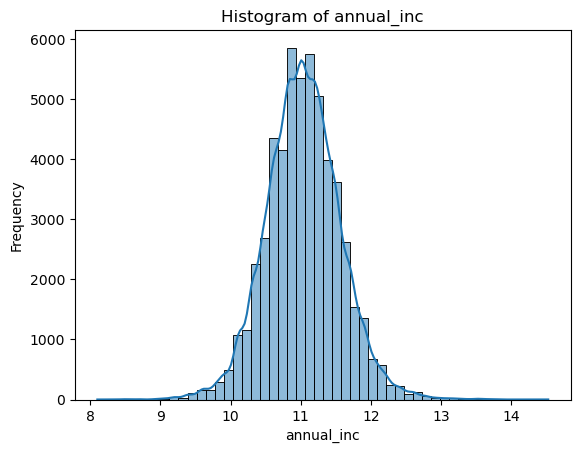

Plotting histogram for dti


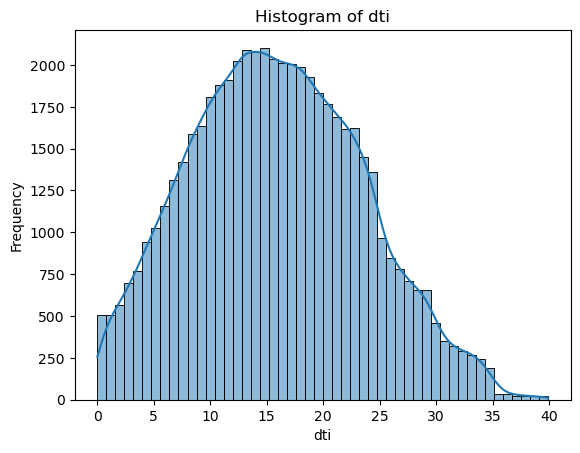

Plotting histogram for delinq_2yrs


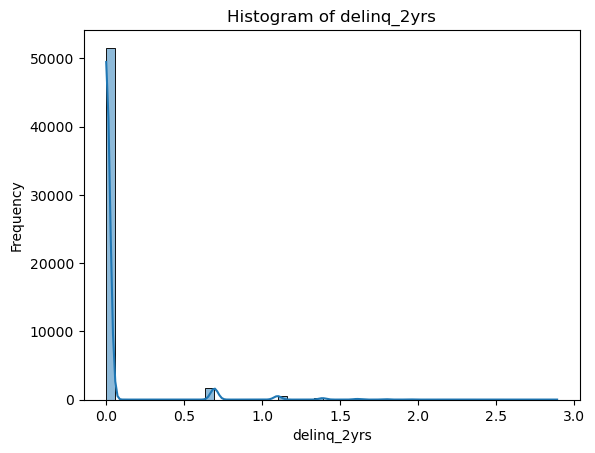

Plotting histogram for inq_last_6mths


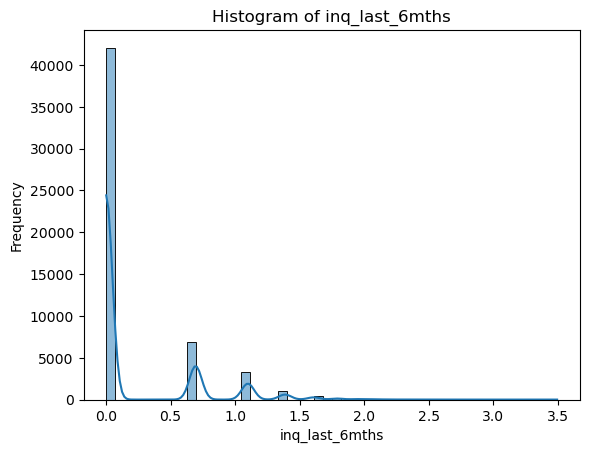

Plotting histogram for mths_since_last_delinq


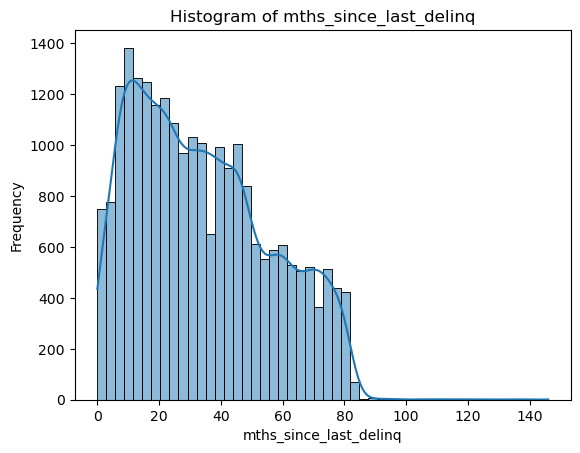

Plotting histogram for mths_since_last_record


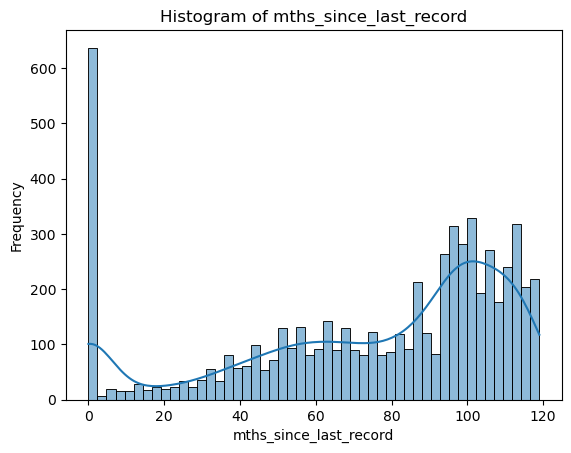

Plotting histogram for open_accounts


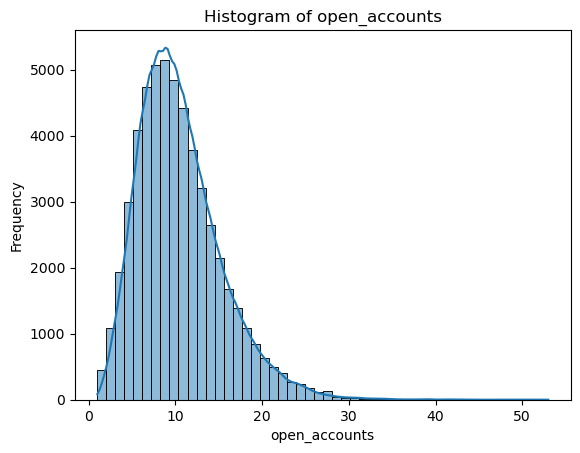

Plotting histogram for total_accounts


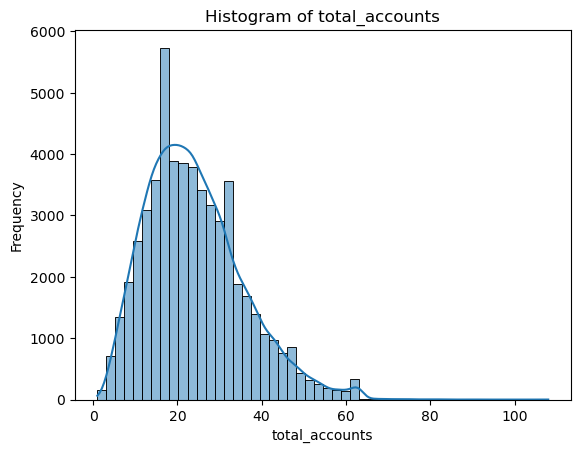

Plotting histogram for out_prncp


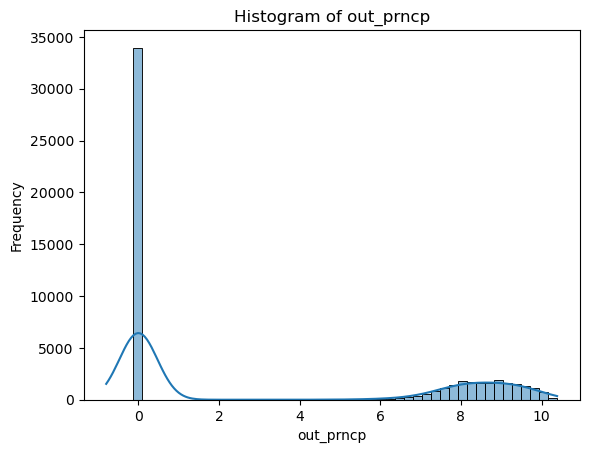

Plotting histogram for out_prncp_inv


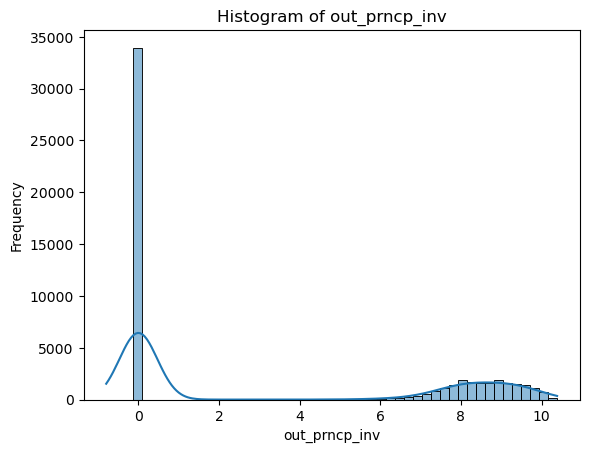

Plotting histogram for total_payment


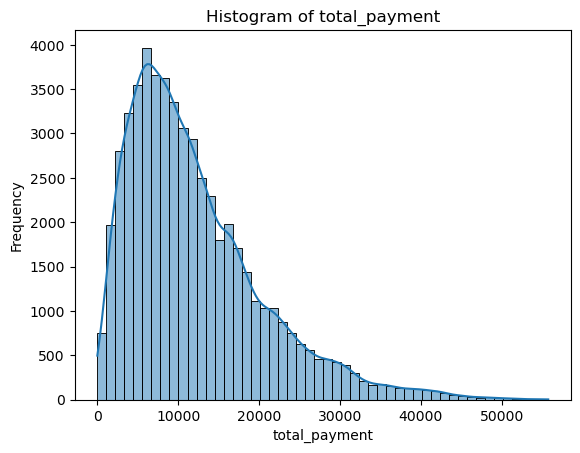

Plotting histogram for total_payment_inv


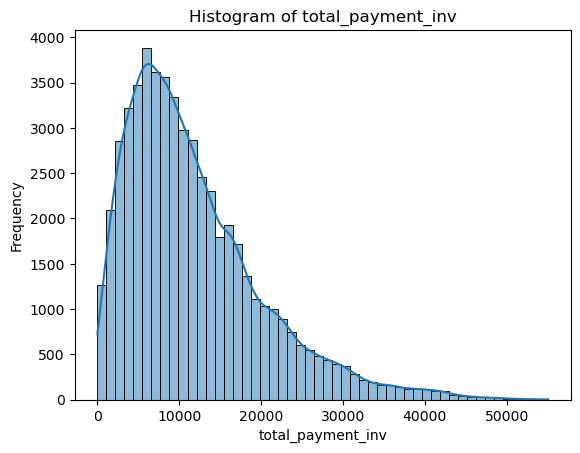

Plotting histogram for total_rec_prncp


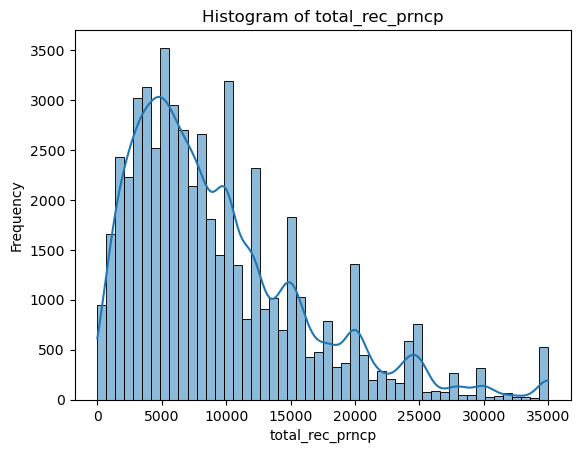

Plotting histogram for total_rec_int


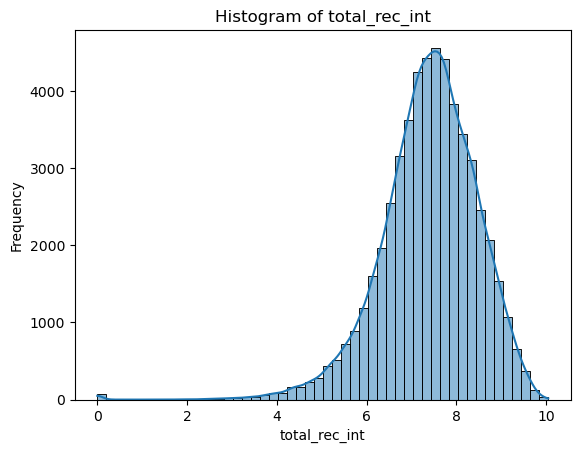

Plotting histogram for total_rec_late_fee


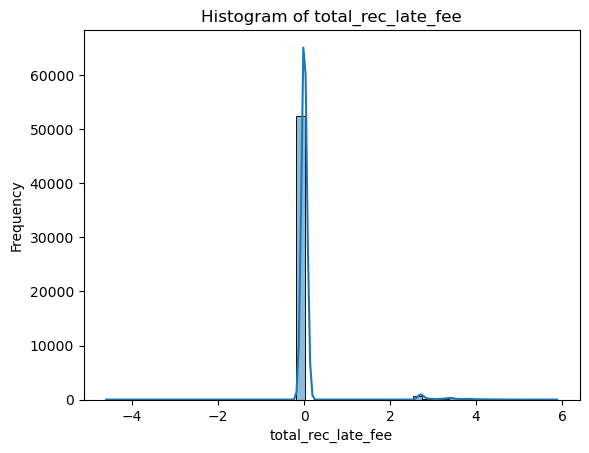

Plotting histogram for recoveries


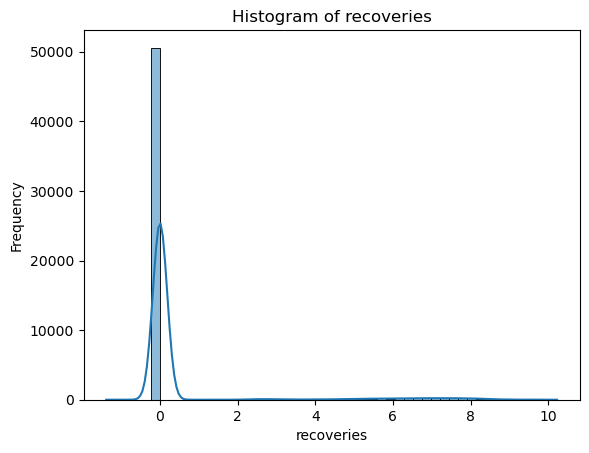

Plotting histogram for collection_recovery_fee


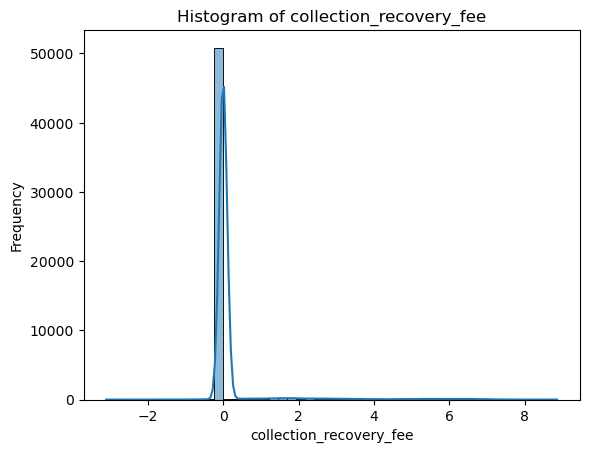

Plotting histogram for last_payment_amount


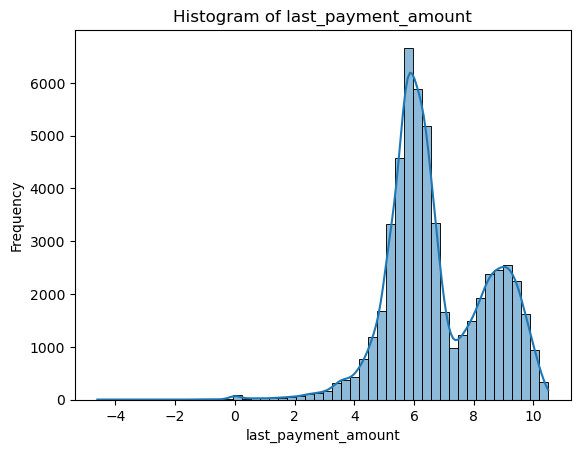

Plotting histogram for collections_12_mths_ex_med


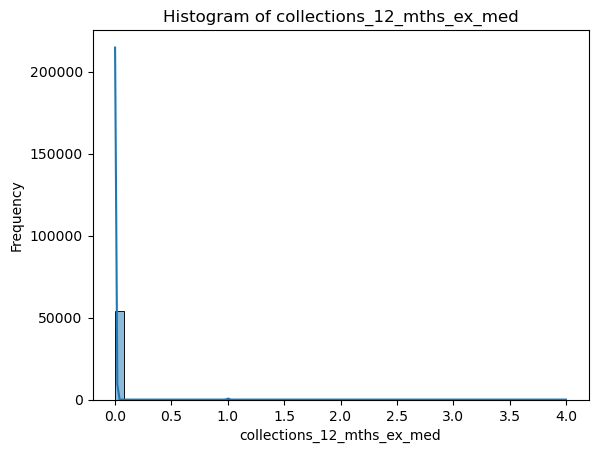

Plotting histogram for mths_since_last_major_derog


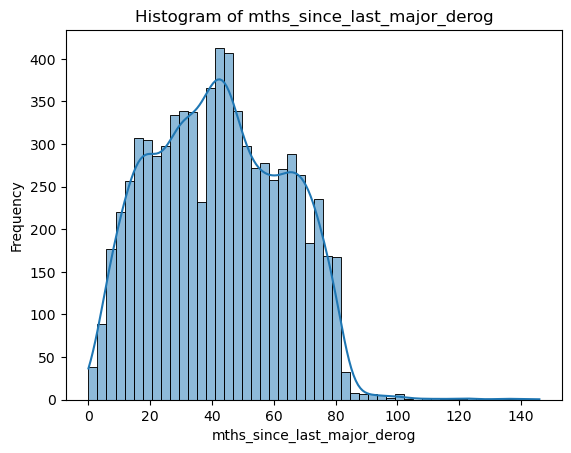

Plotting histogram for policy_code


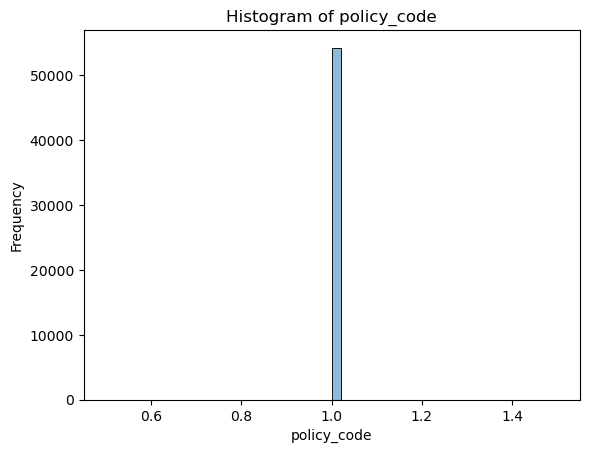

In [20]:
print("Plotting histograms for all numeric columns to check for outliers...")
plotter.plot_all_numeric_columns()

Generating box plots for all numeric columns...


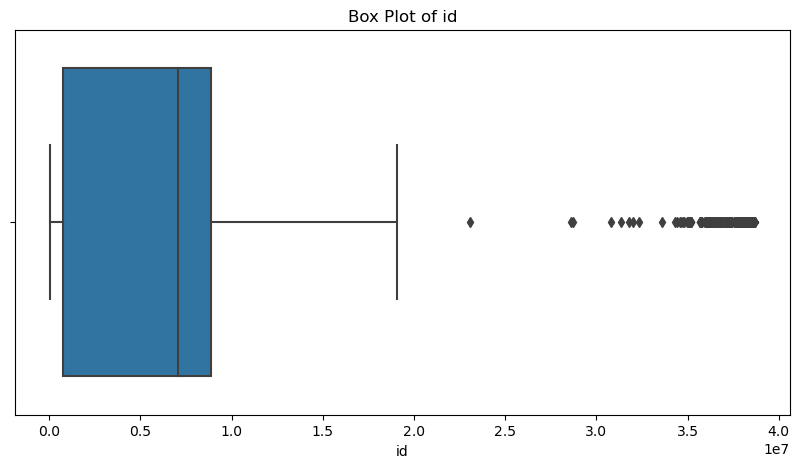

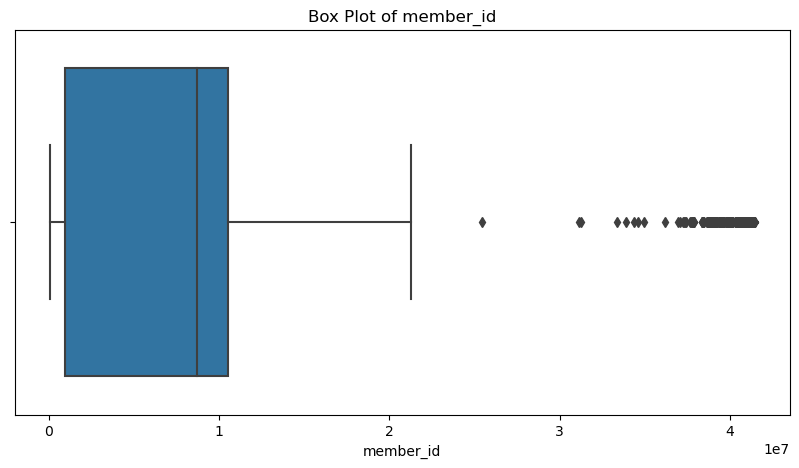

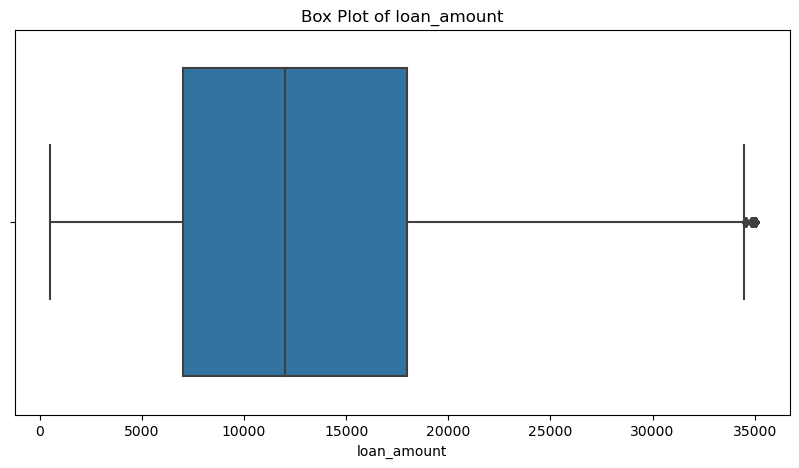

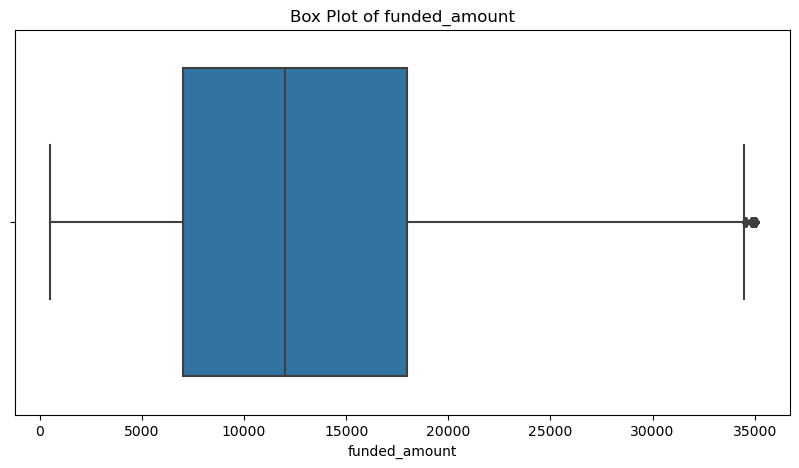

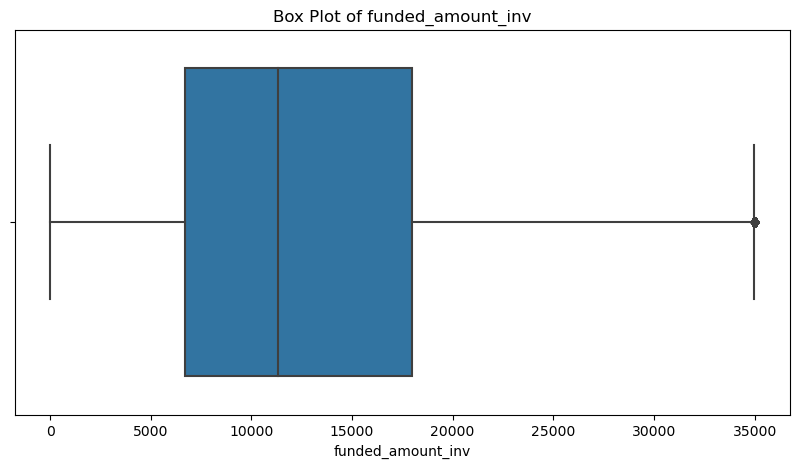

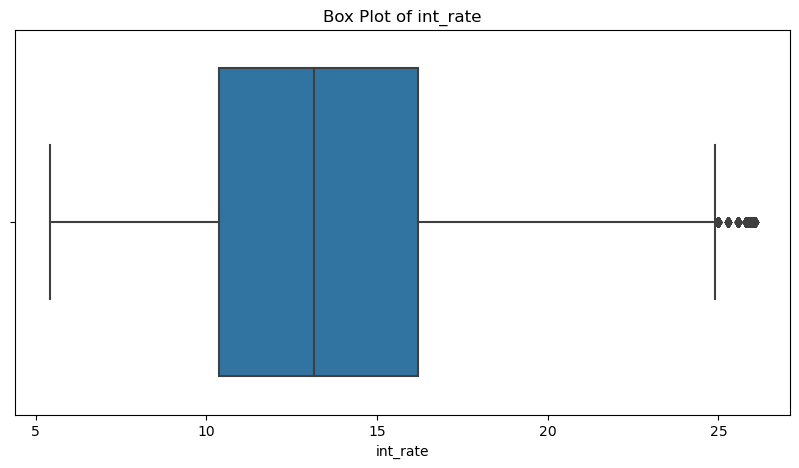

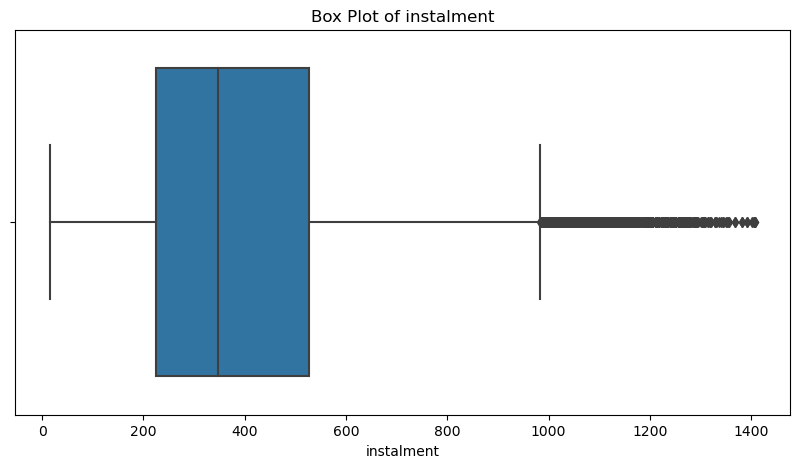

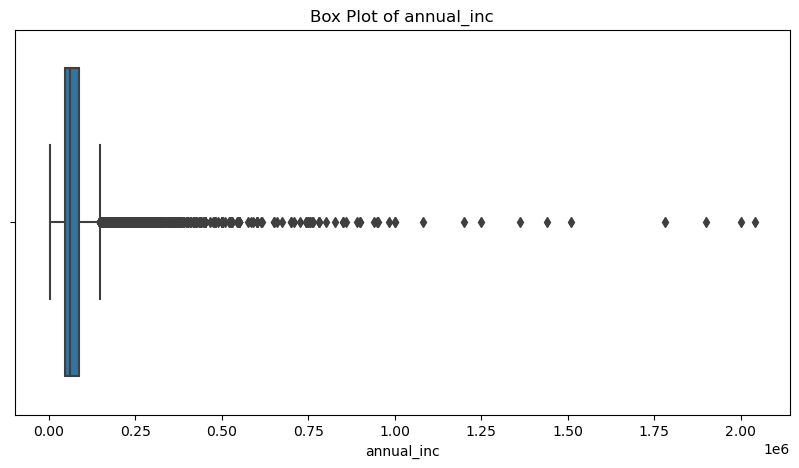

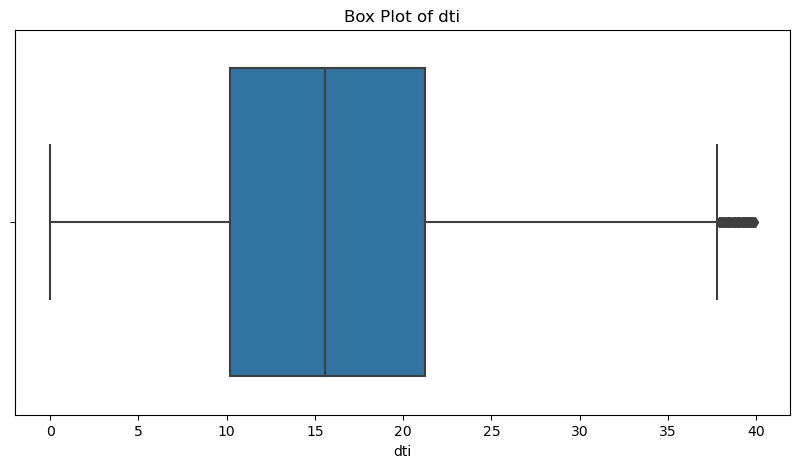

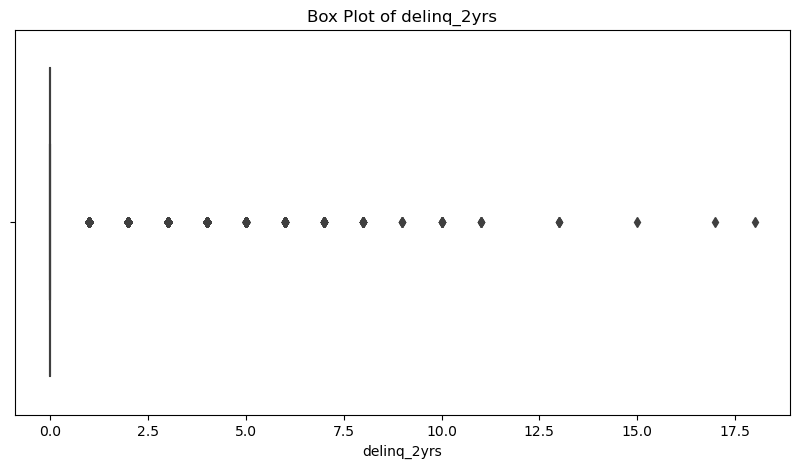

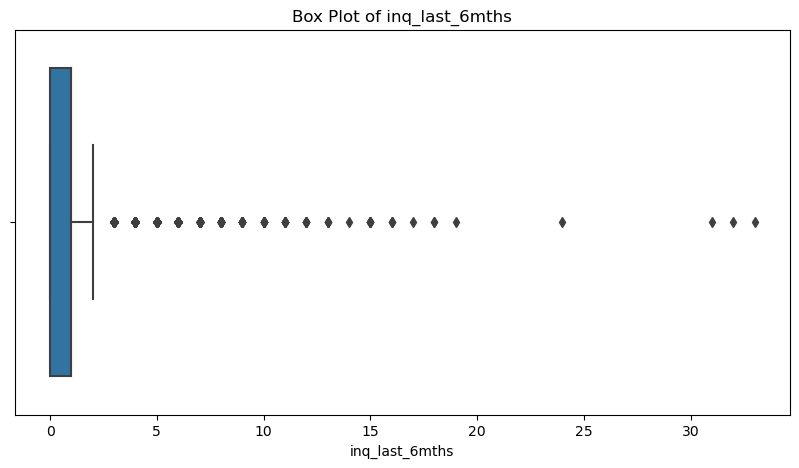

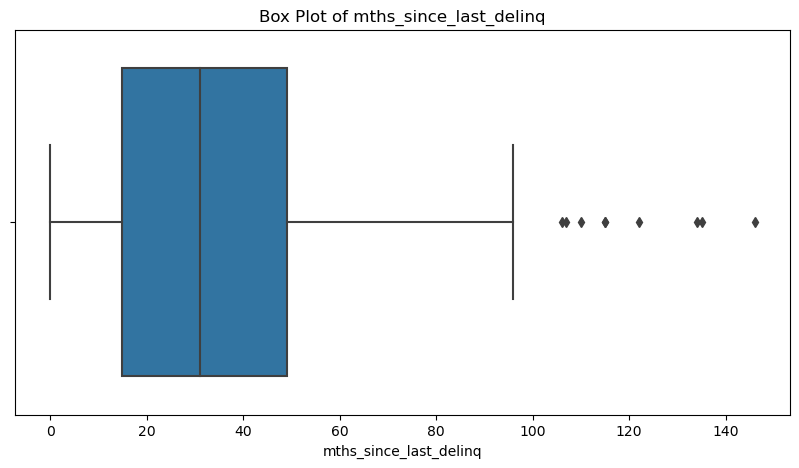

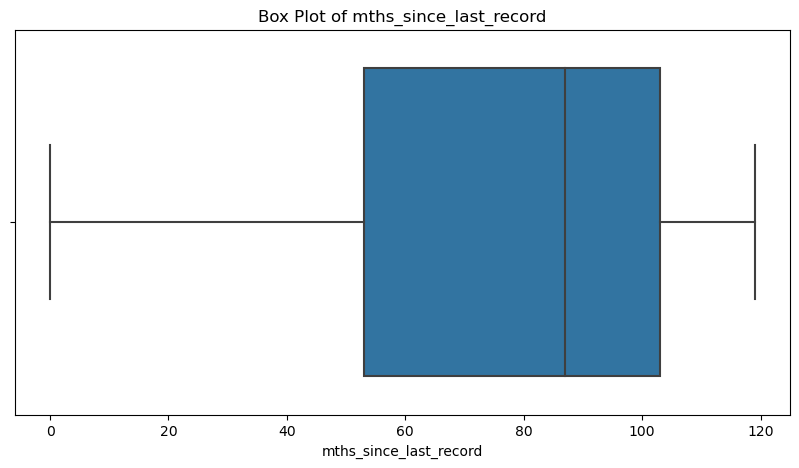

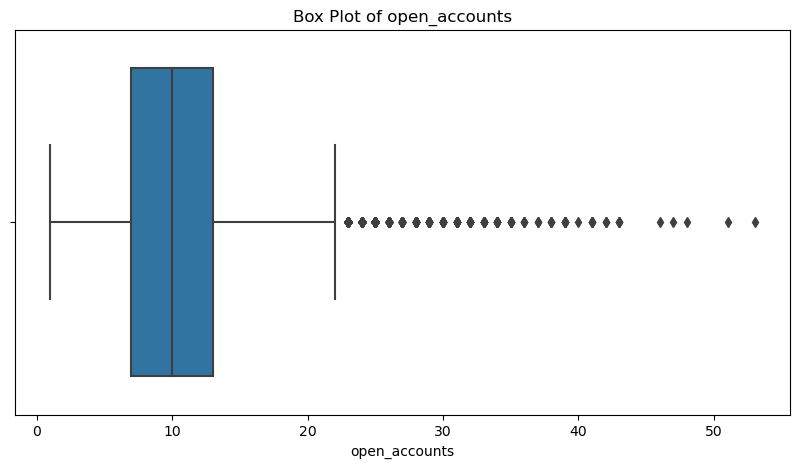

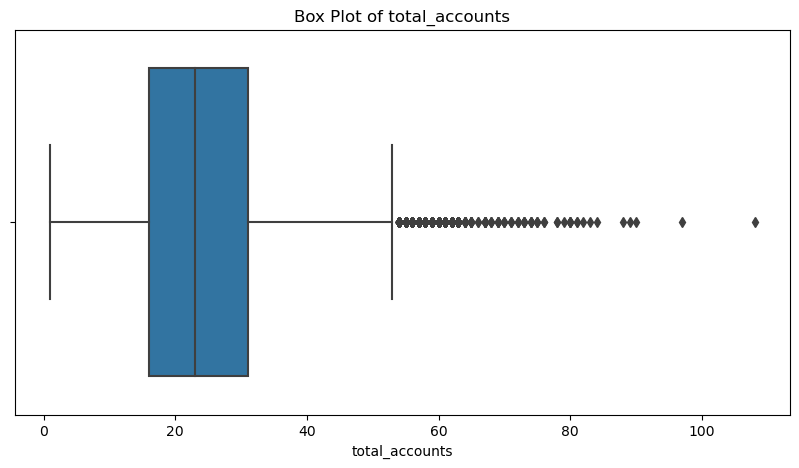

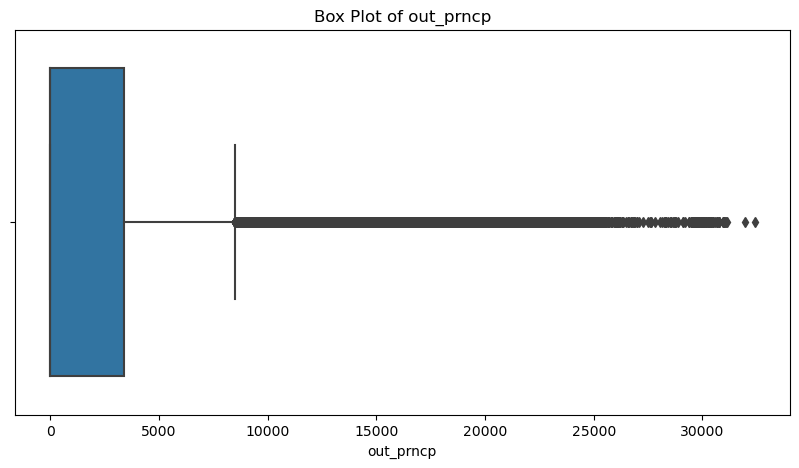

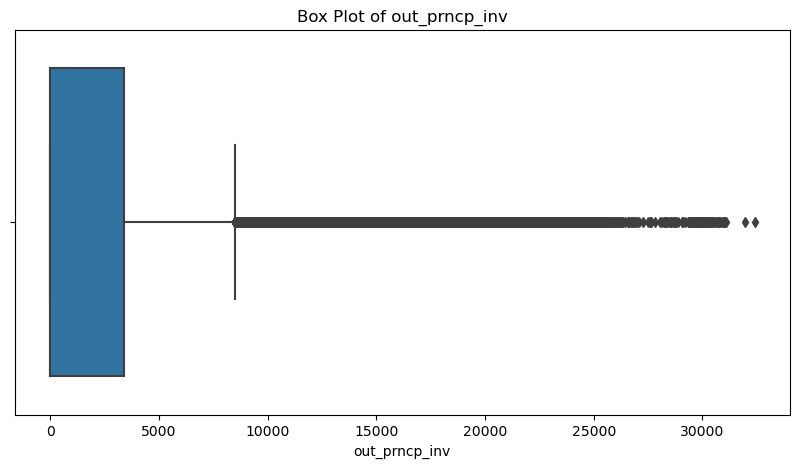

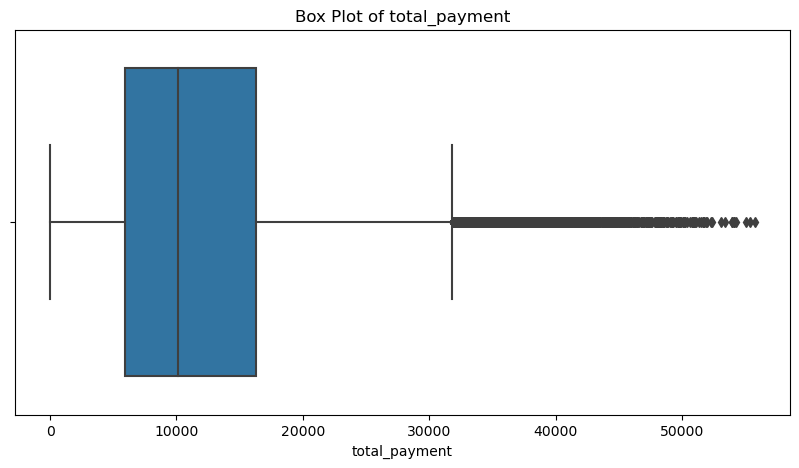

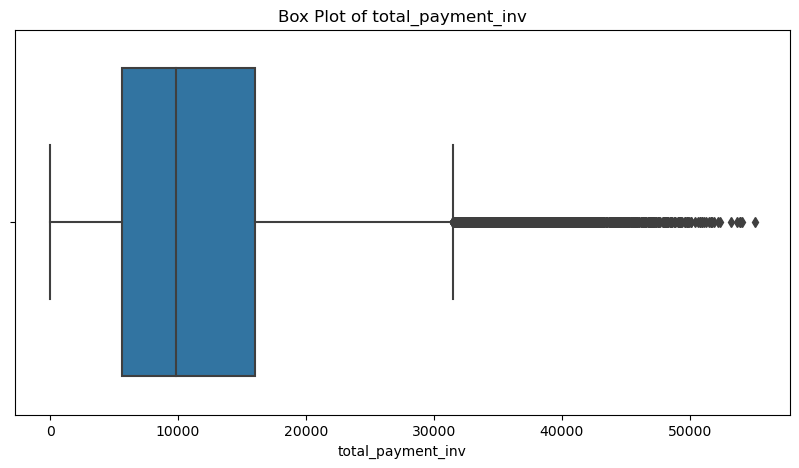

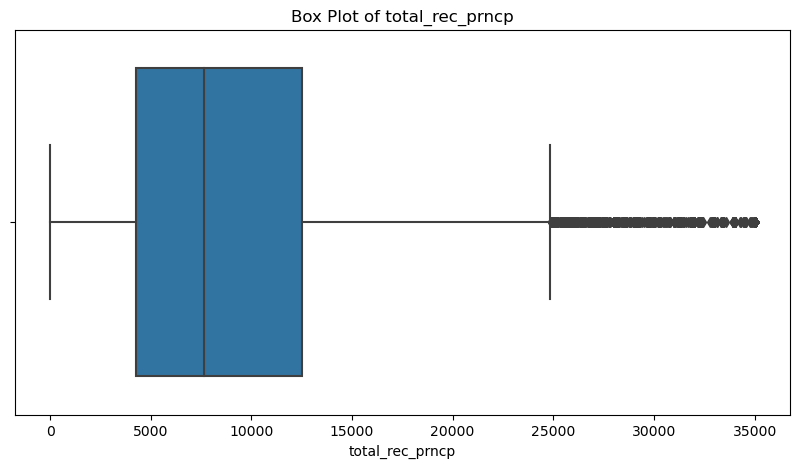

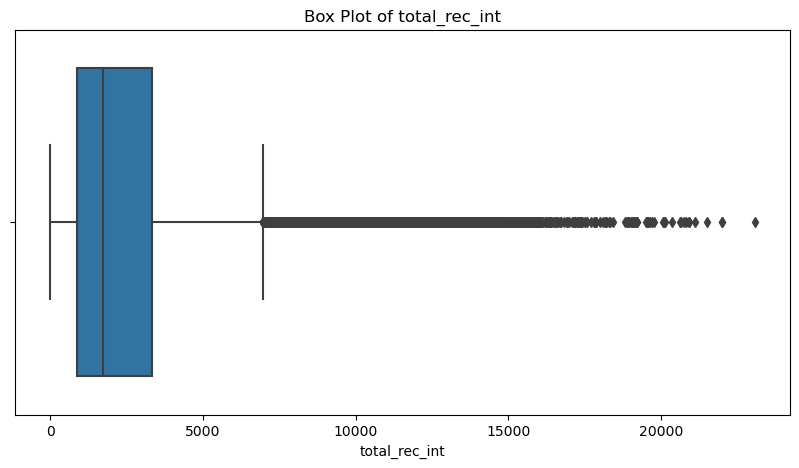

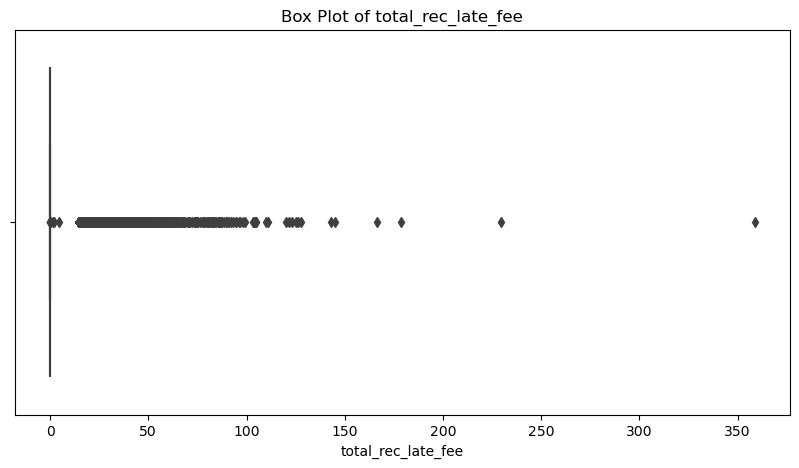

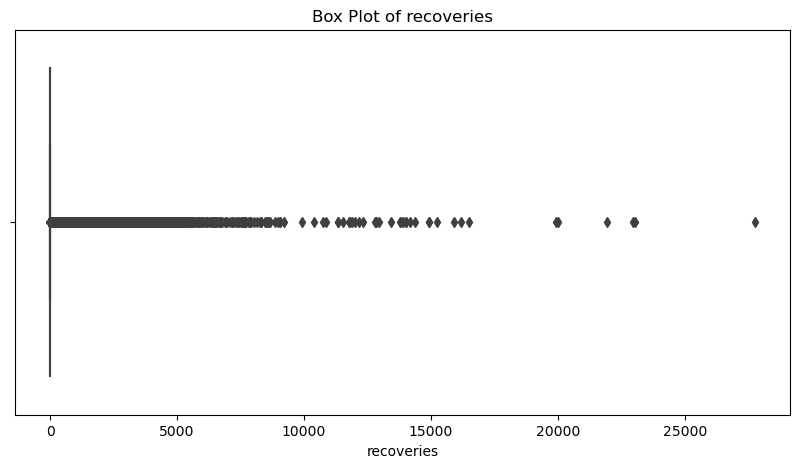

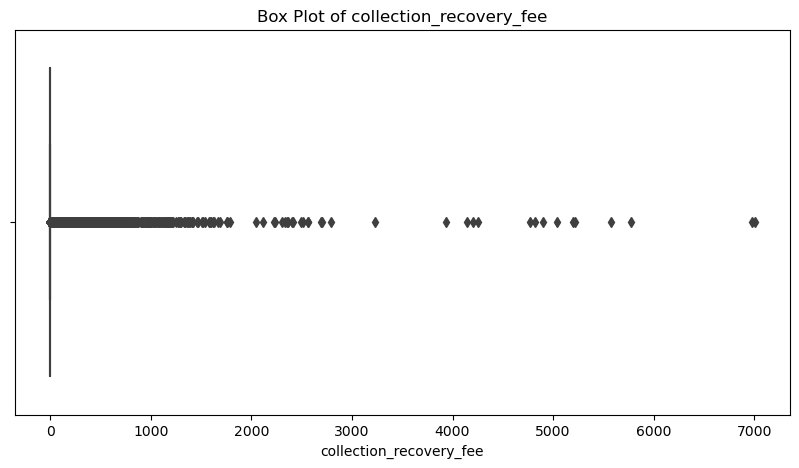

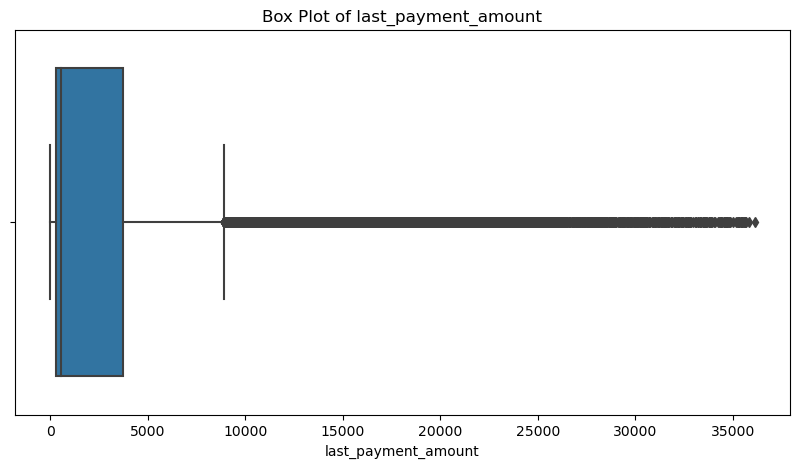

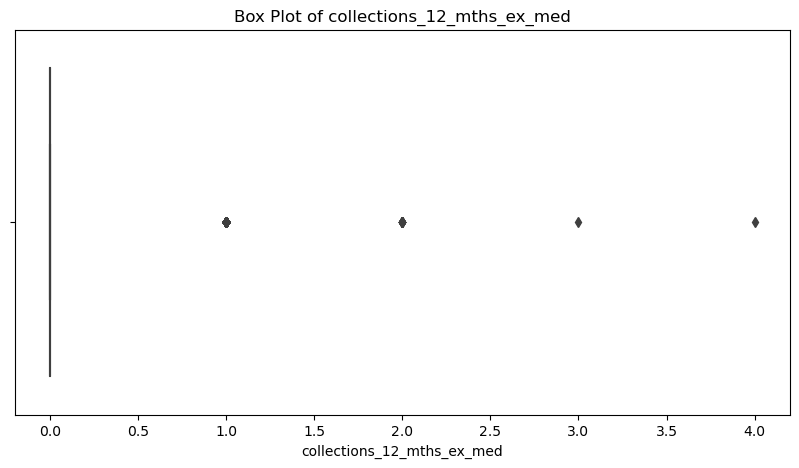

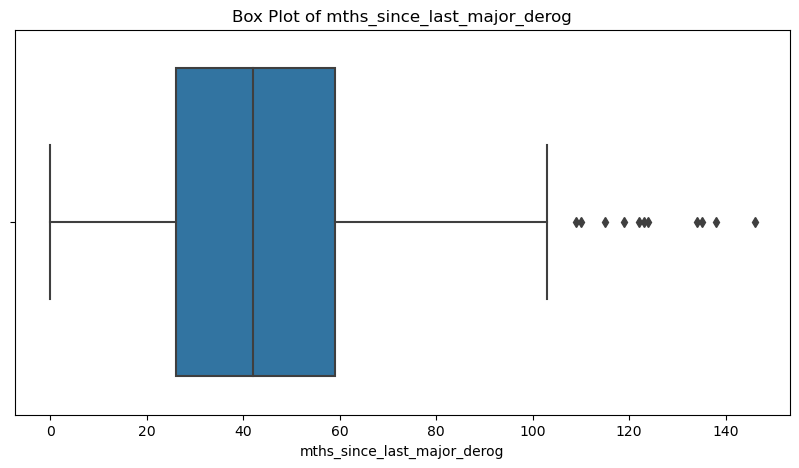

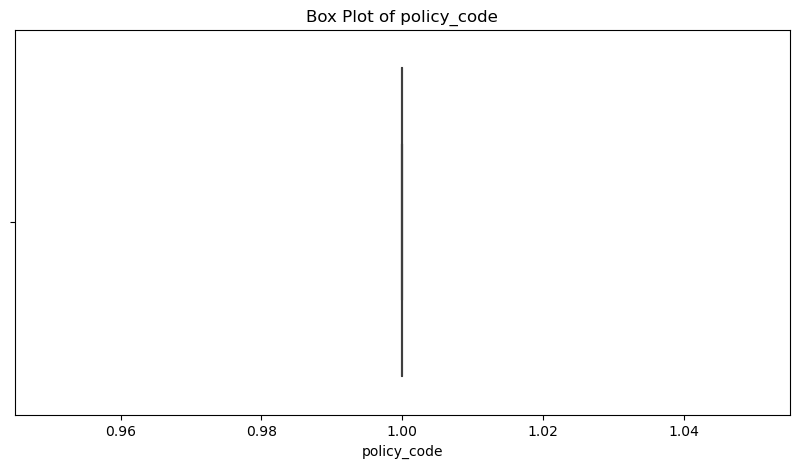

In [20]:
#Check for outliers in columns after skewness transformation
import importlib
import data_analysis
importlib.reload(data_analysis)
from data_analysis import Plotter
import pandas as pd

# Load your dataset
data_frame = pd.read_csv('loan_payments.csv')

# Create an instance of the Plotter class
plotter = Plotter(data_frame)

# Generate box plots for all numeric columns
print("Generating box plots for all numeric columns...")
plotter.plot_all_boxplots()

In [21]:
import pandas as pd

# Load data
data_frame = pd.read_csv('loan_payments.csv')

# Inspect the data
print(data_frame.info())
print(data_frame.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

In [23]:
from importlib import reload
import data_analysis
reload(data_analysis)
from data_analysis import DataFrameTransform



In [34]:
df_transform = DataFrameTransform(data_frame)

print("Before outlier removal:")
print(df_transform.df.describe())

# Remove outliers using IQR
df_transform.remove_outliers_iqr()

print("After outlier removal:")
print(df_transform.df.describe())

Before outlier removal:
                 id     member_id   loan_amount  funded_amount  \
count  5.423100e+04  5.423100e+04  54231.000000   51224.000000   
mean   7.621797e+06  8.655350e+06  13333.076100   13229.509117   
std    9.571362e+06  1.031281e+07   8082.196709    8019.017599   
min    5.552100e+04  7.069400e+04    500.000000     500.000000   
25%    7.594330e+05  9.587720e+05   7000.000000    7000.000000   
50%    7.084590e+06  8.709873e+06  12000.000000   12000.000000   
75%    8.860616e+06  1.052714e+07  18000.000000   18000.000000   
max    3.867612e+07  4.146185e+07  35000.000000   35000.000000   

       funded_amount_inv      int_rate    instalment    annual_inc  \
count       54231.000000  49062.000000  54231.000000  5.423100e+04   
mean        12952.622979     13.507328    400.013953  7.222085e+04   
std          8099.473527      4.392893    238.920012  5.158934e+04   
min             0.000000      5.420000     15.670000  3.300000e+03   
25%          6700.000000     10

Generating box plots after outlier removal...


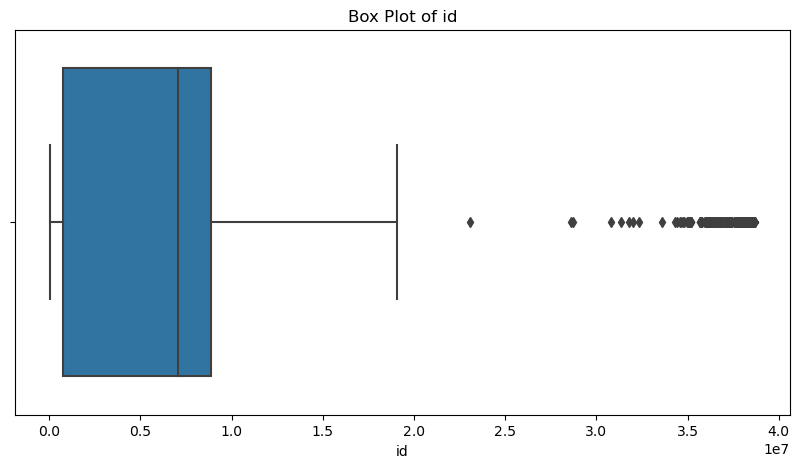

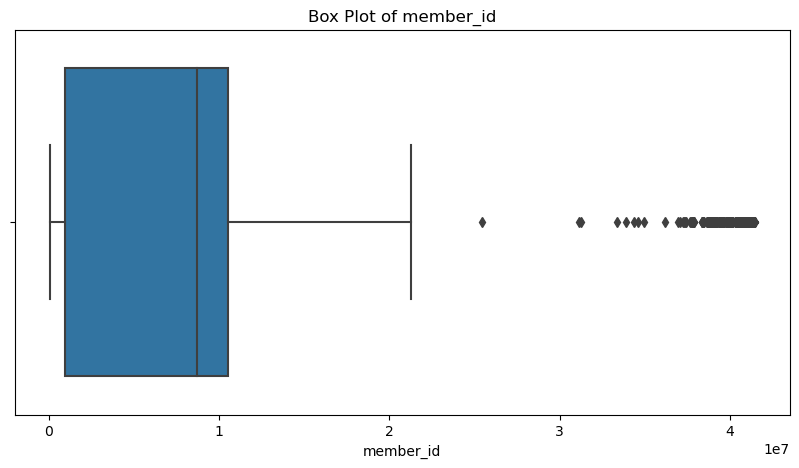

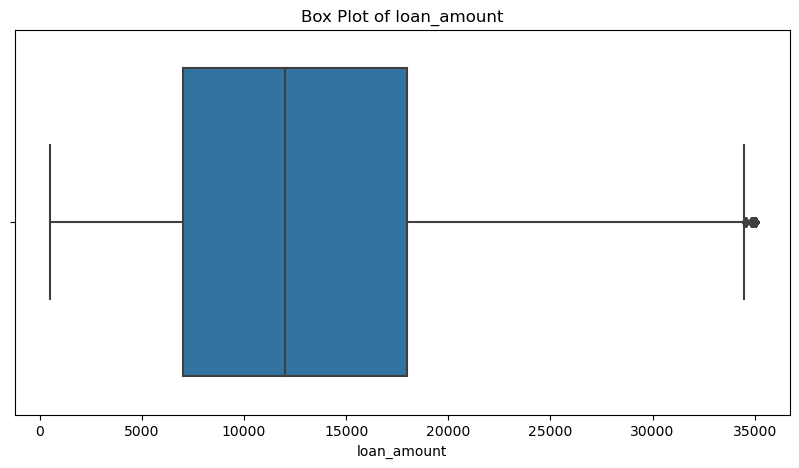

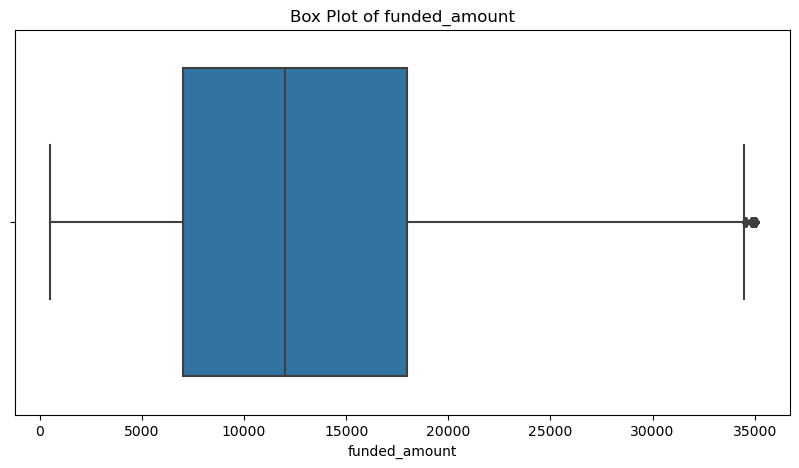

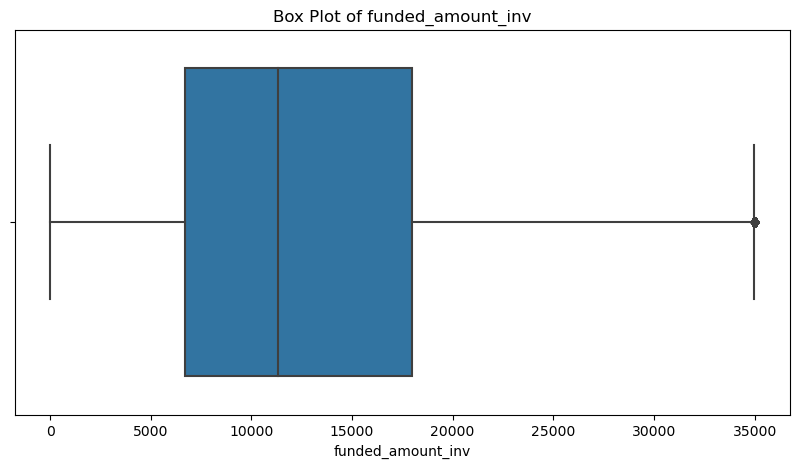

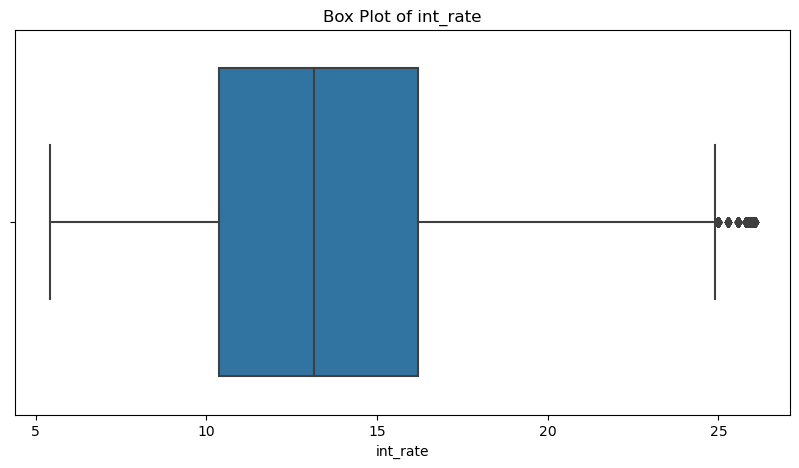

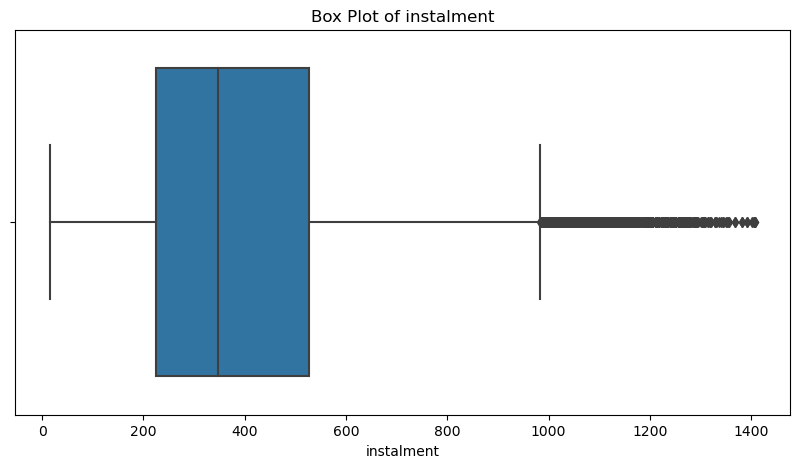

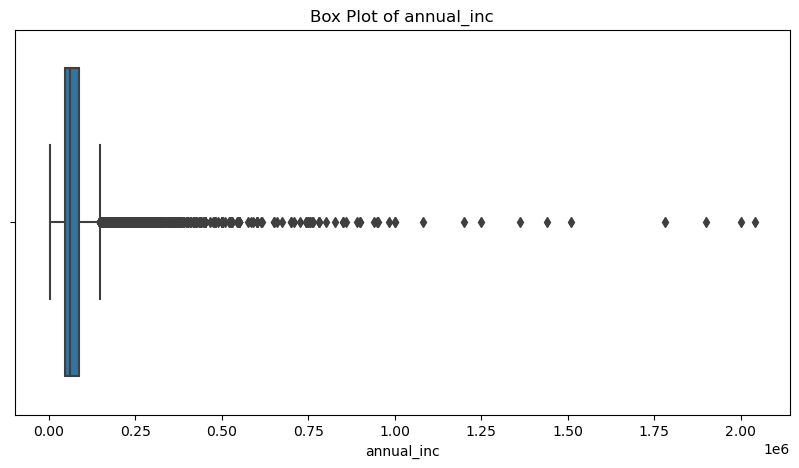

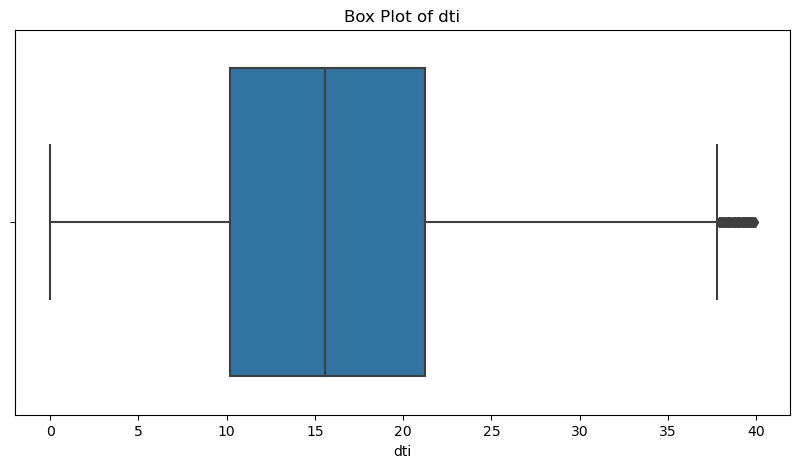

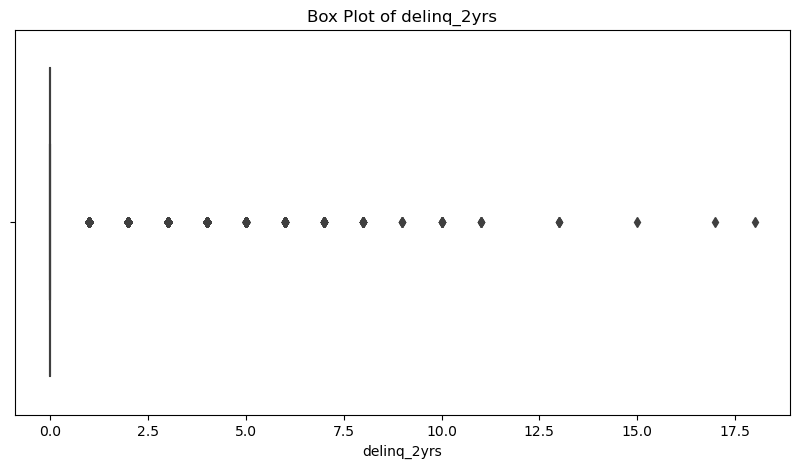

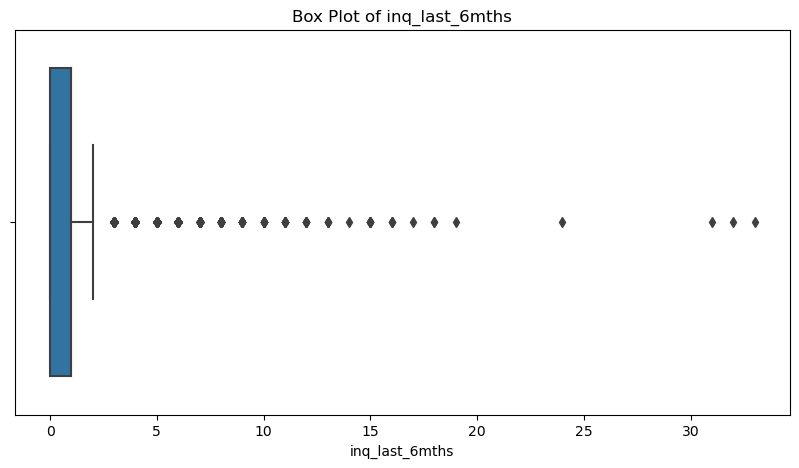

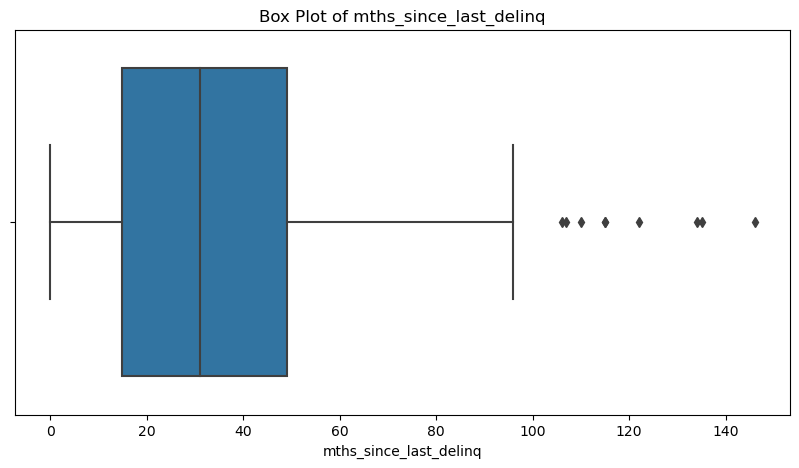

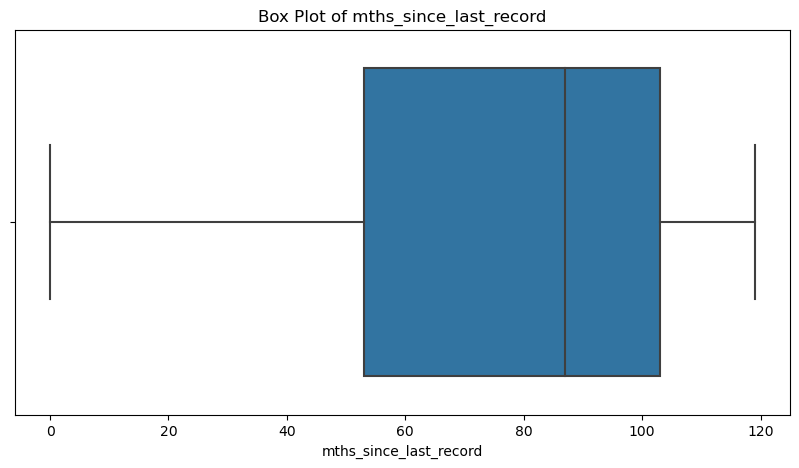

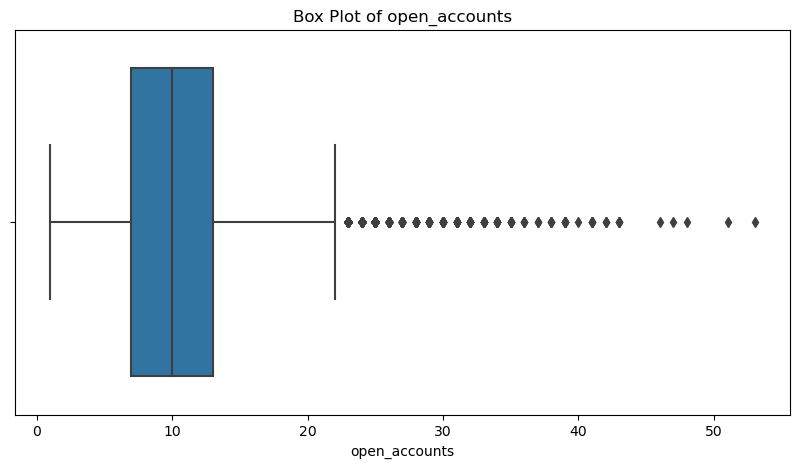

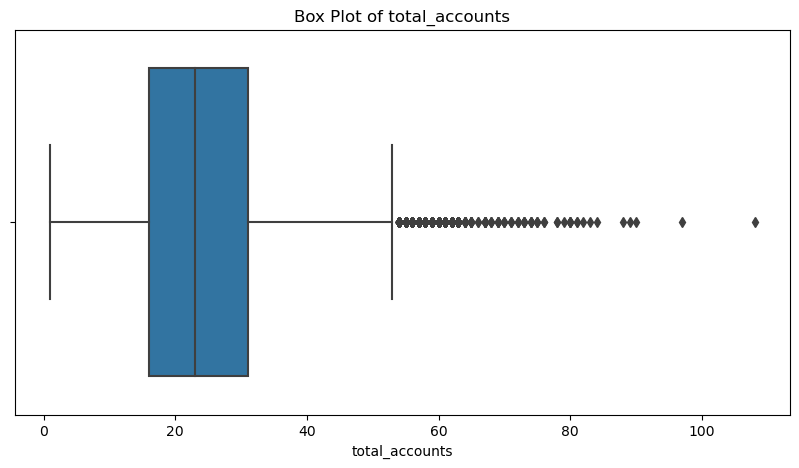

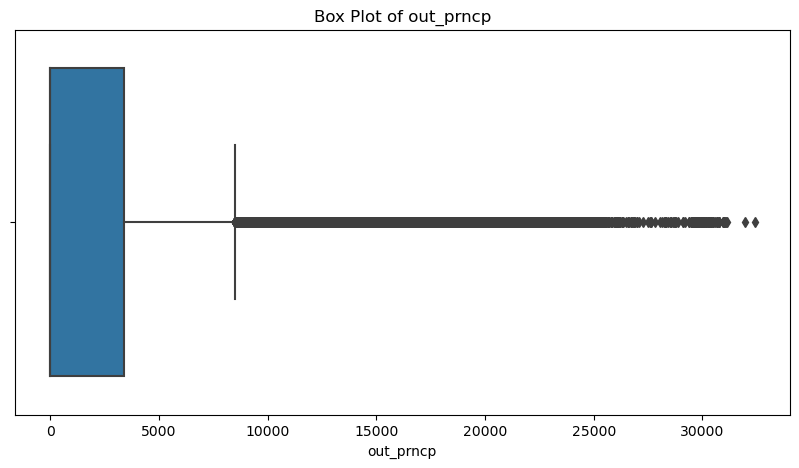

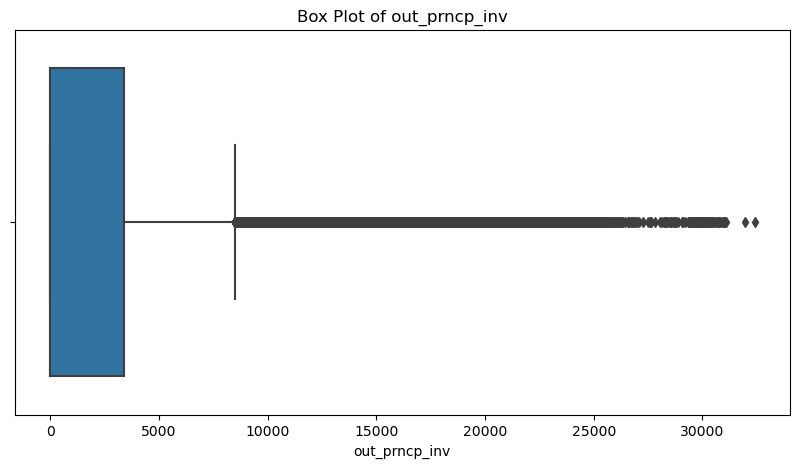

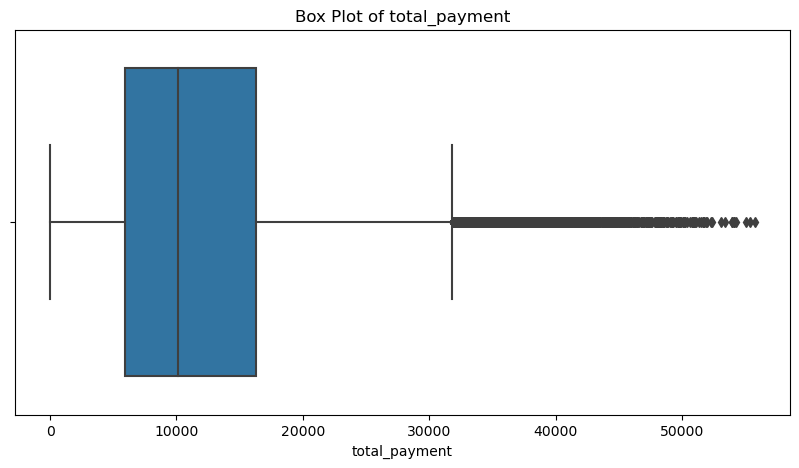

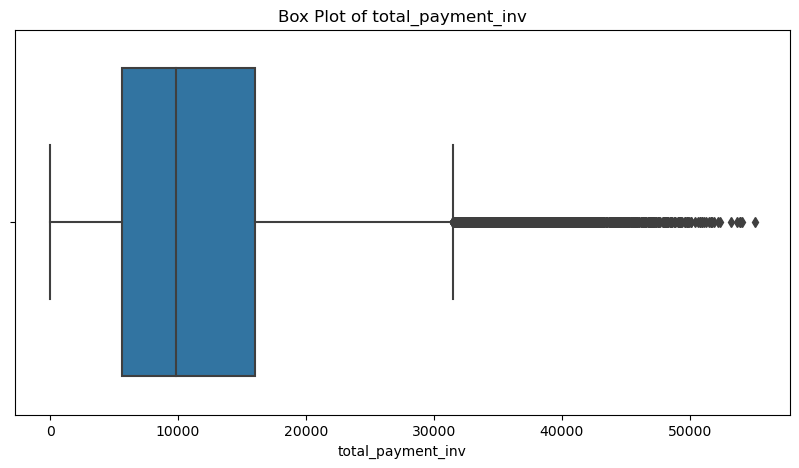

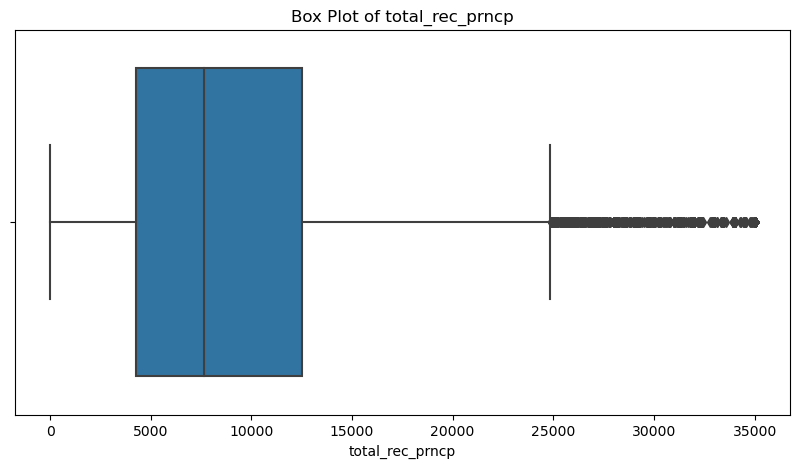

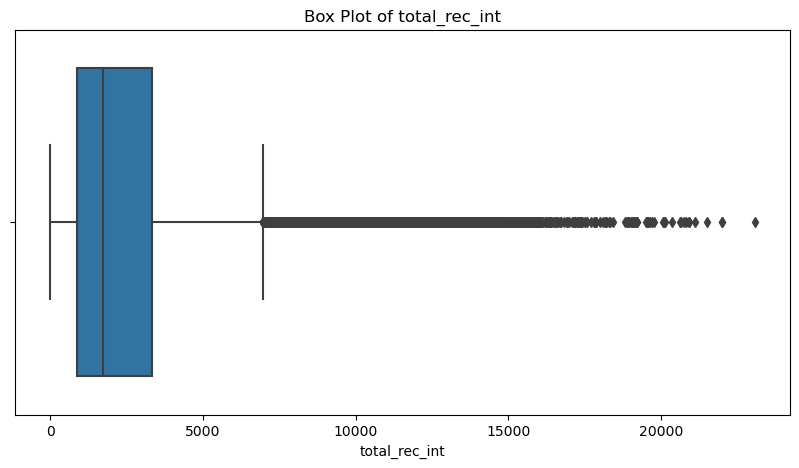

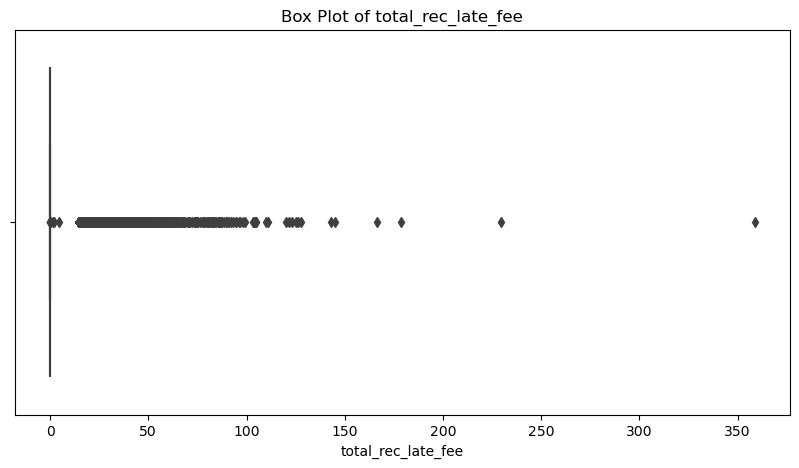

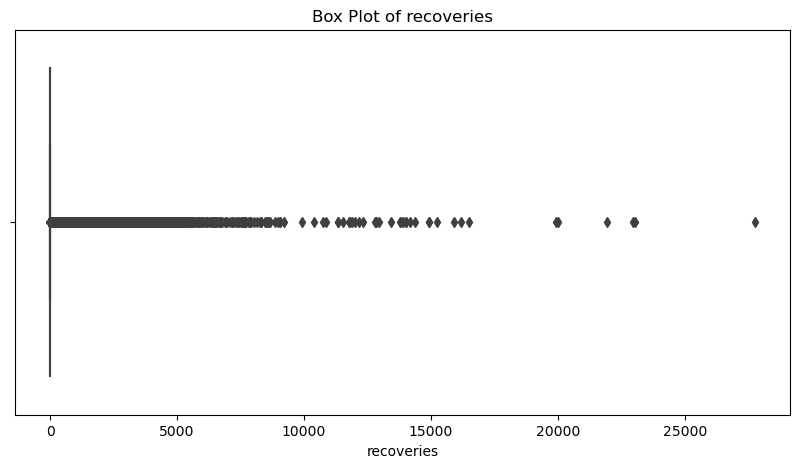

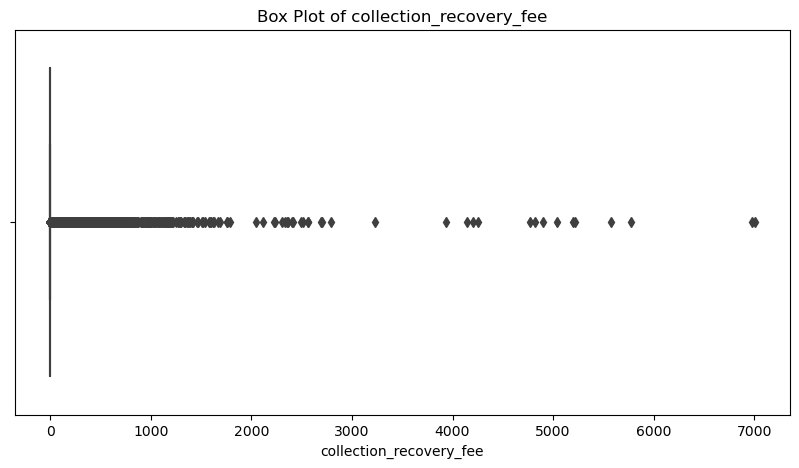

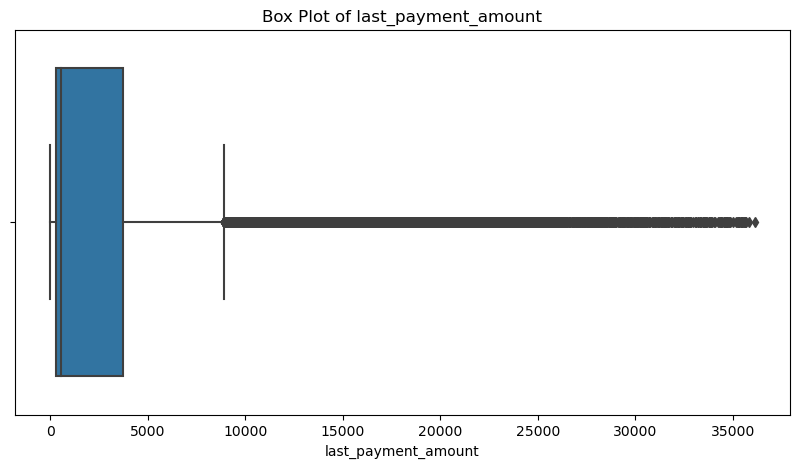

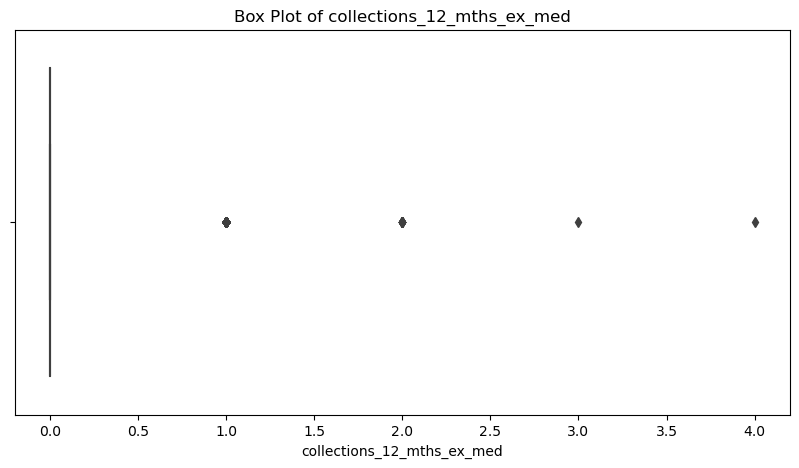

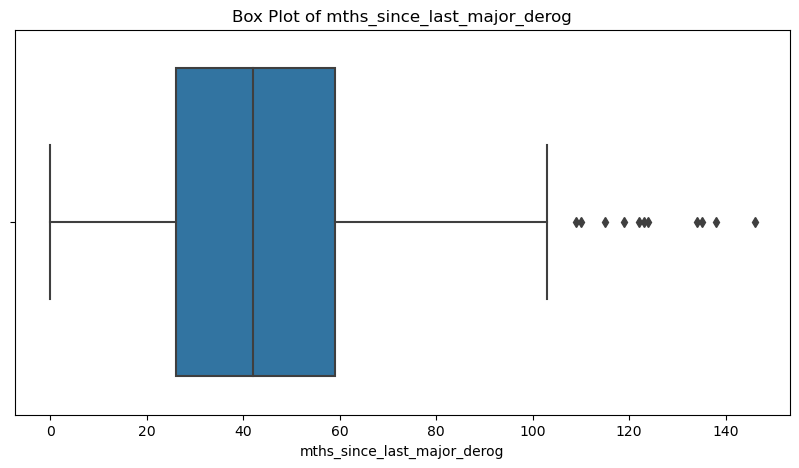

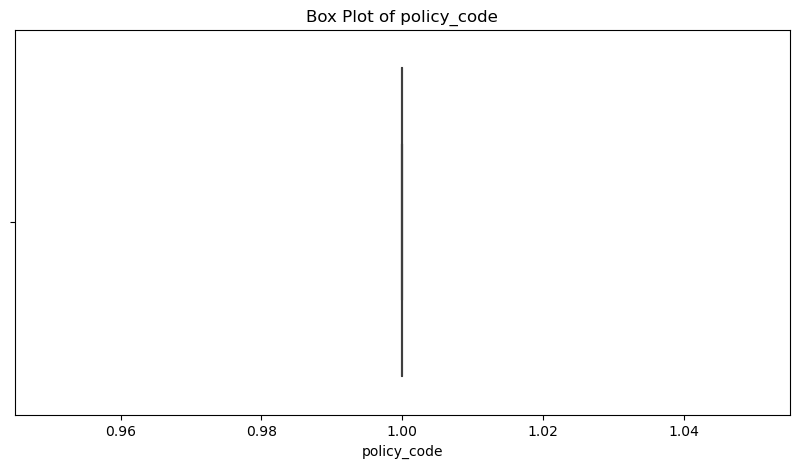

In [36]:
print("Generating box plots after outlier removal...")
plotter.plot_all_boxplots()

In [37]:
df_transform = DataFrameTransform(data_frame)

print("Before outlier removal:")
print(df_transform.df.describe())

# Remove outliers using IQR
df_transform.remove_outliers_iqr()

print("After outlier removal:")
print(df_transform.df.describe())

Before outlier removal:
                 id     member_id   loan_amount  funded_amount  \
count  5.423100e+04  5.423100e+04  54231.000000   51224.000000   
mean   7.621797e+06  8.655350e+06  13333.076100   13229.509117   
std    9.571362e+06  1.031281e+07   8082.196709    8019.017599   
min    5.552100e+04  7.069400e+04    500.000000     500.000000   
25%    7.594330e+05  9.587720e+05   7000.000000    7000.000000   
50%    7.084590e+06  8.709873e+06  12000.000000   12000.000000   
75%    8.860616e+06  1.052714e+07  18000.000000   18000.000000   
max    3.867612e+07  4.146185e+07  35000.000000   35000.000000   

       funded_amount_inv      int_rate    instalment    annual_inc  \
count       54231.000000  49062.000000  54231.000000  5.423100e+04   
mean        12952.622979     13.507328    400.013953  7.222085e+04   
std          8099.473527      4.392893    238.920012  5.158934e+04   
min             0.000000      5.420000     15.670000  3.300000e+03   
25%          6700.000000     10

Generating box plots after outlier removal...


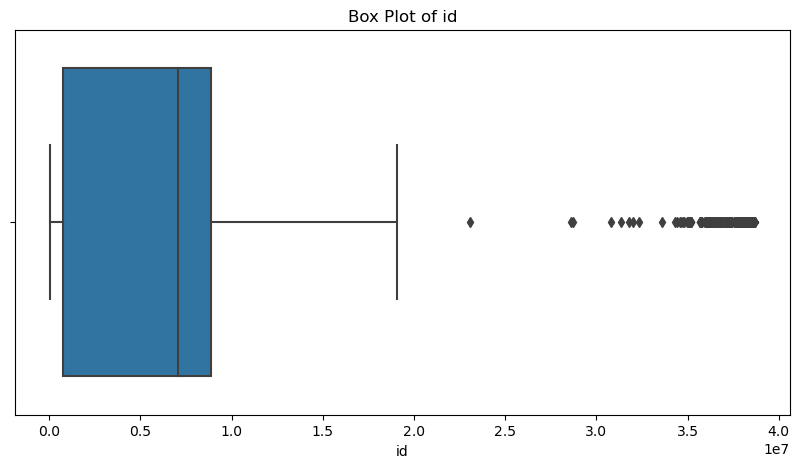

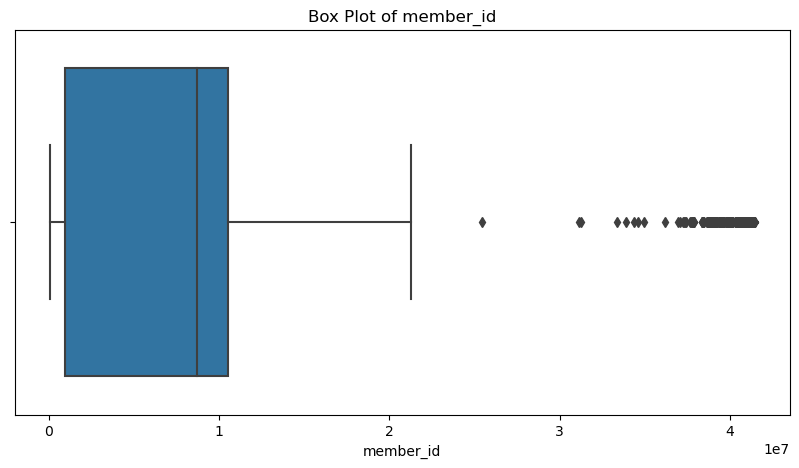

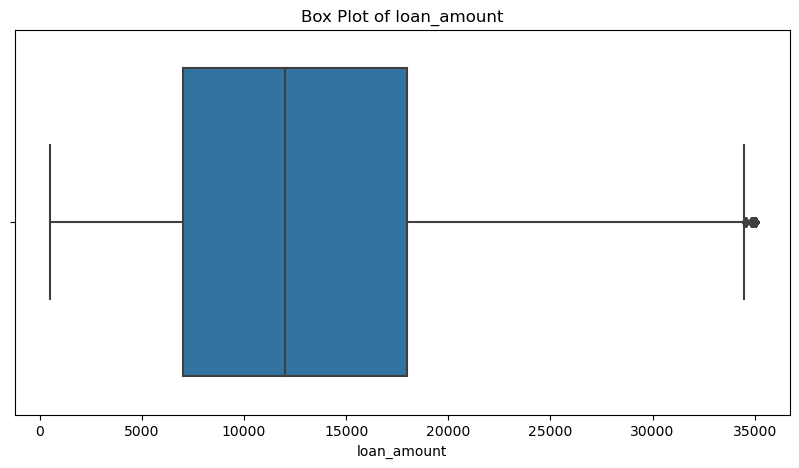

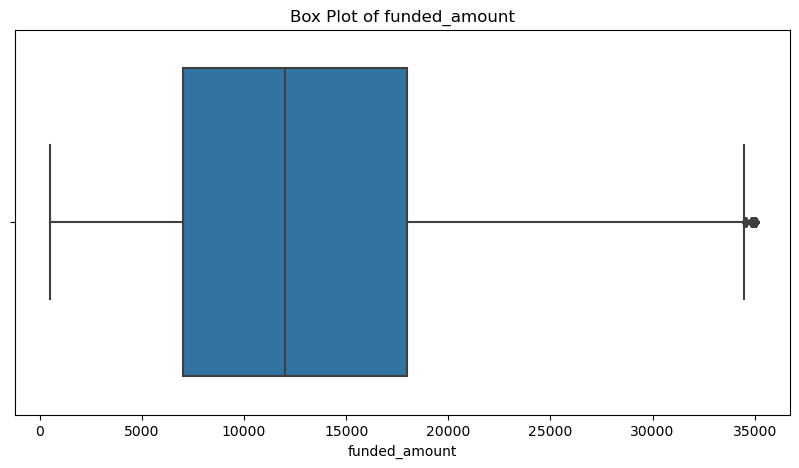

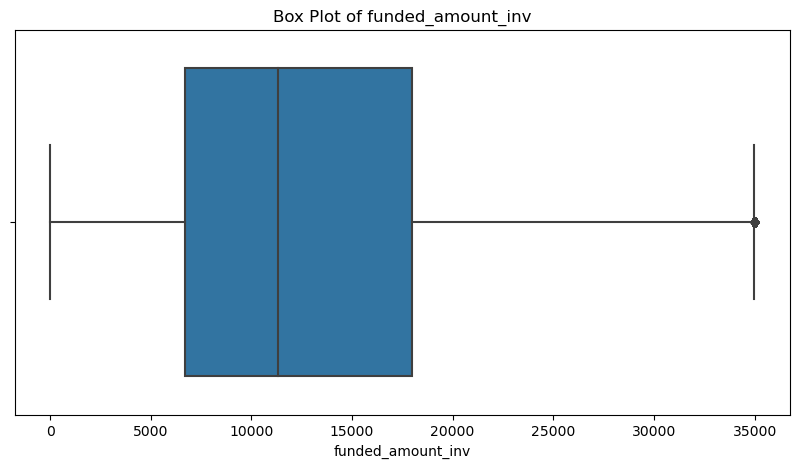

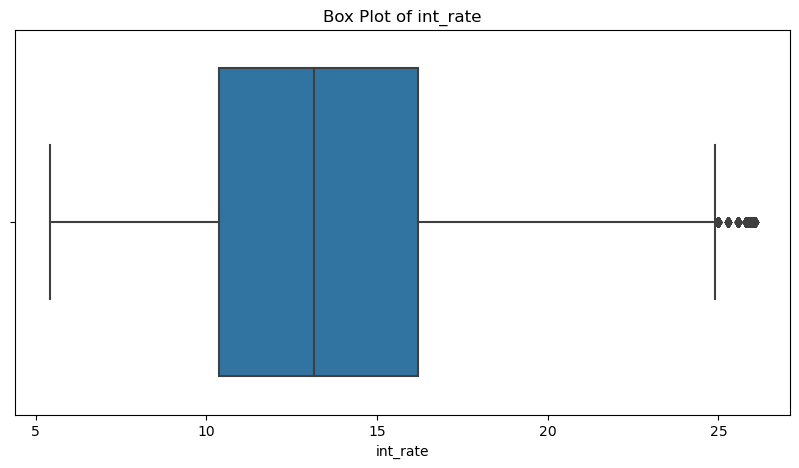

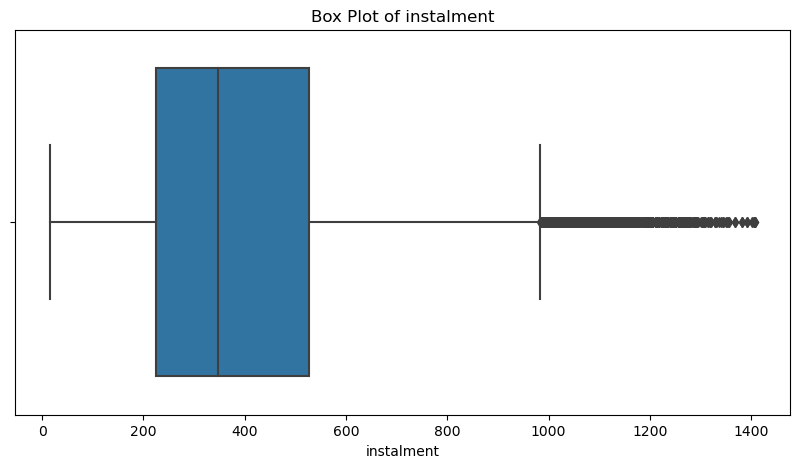

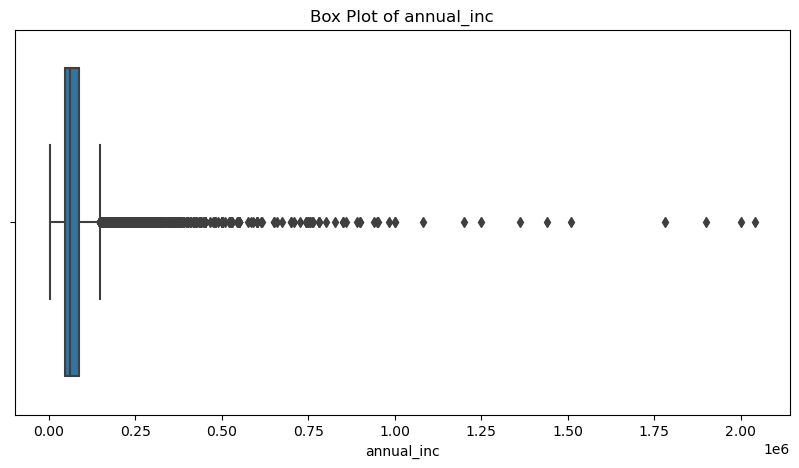

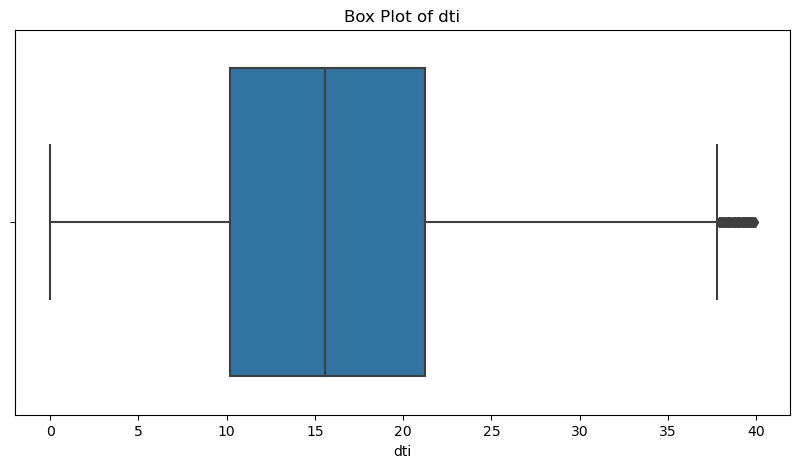

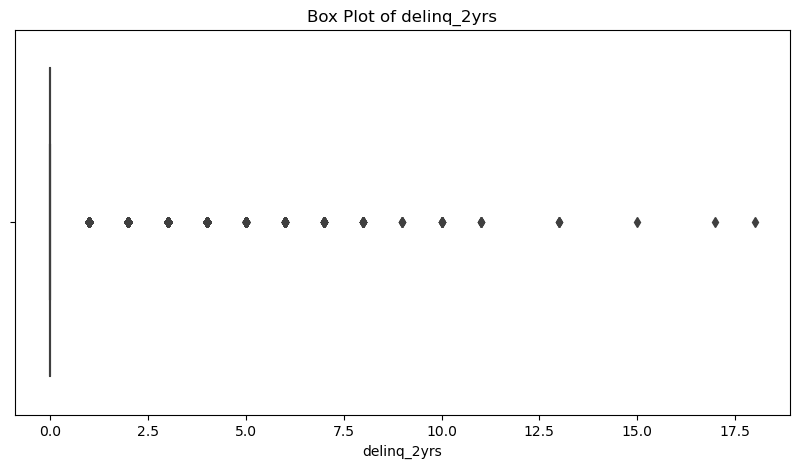

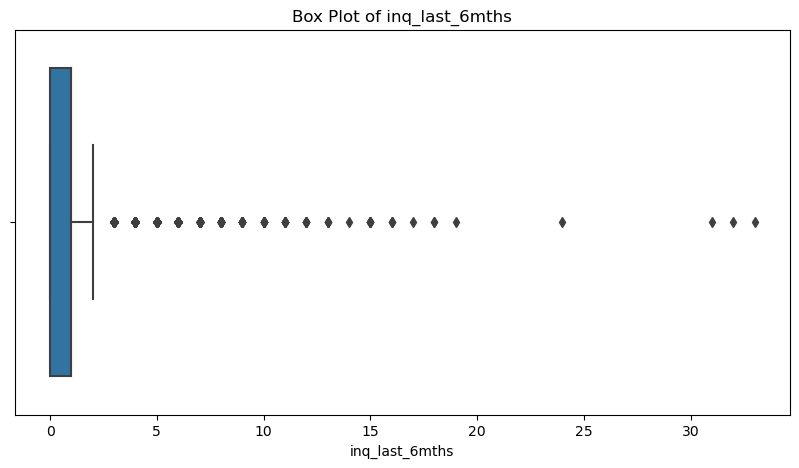

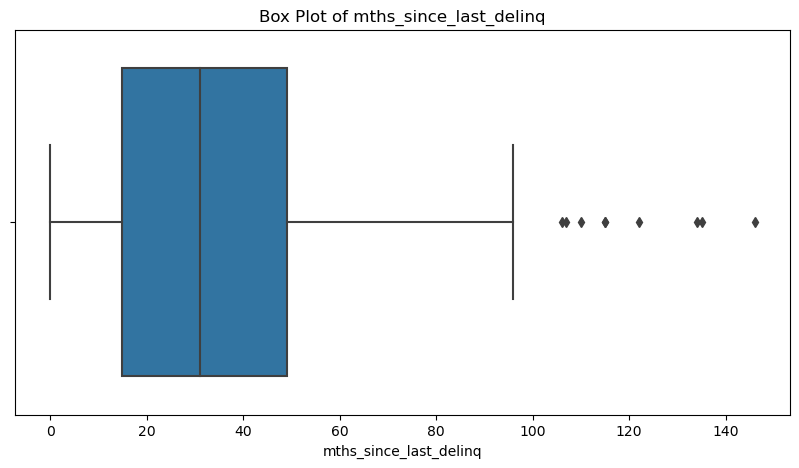

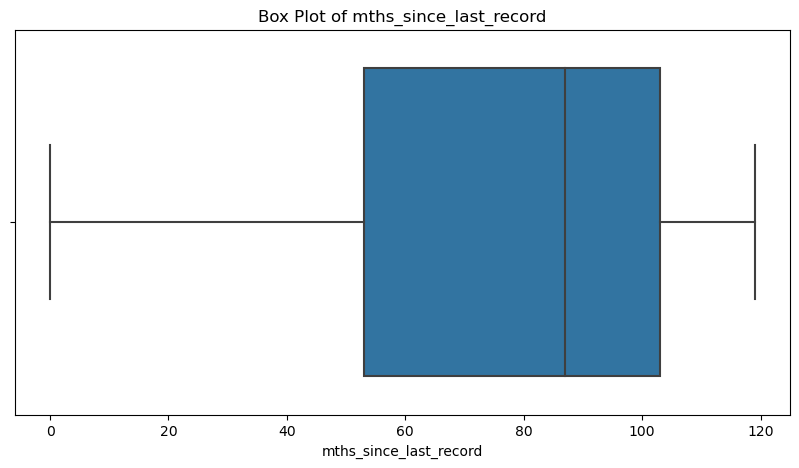

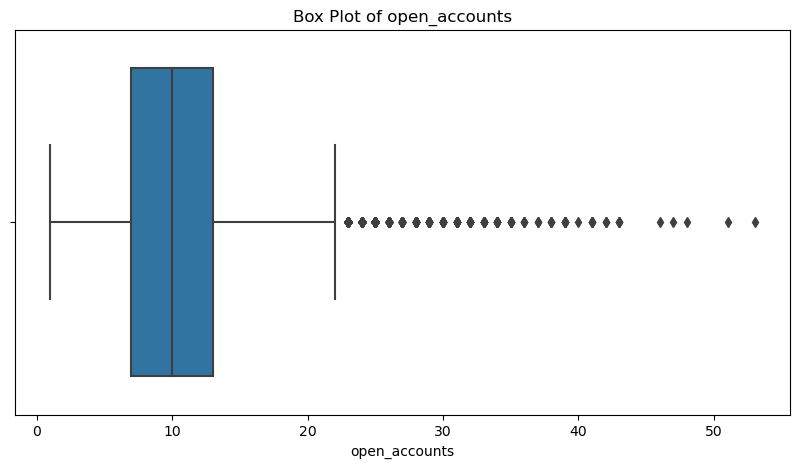

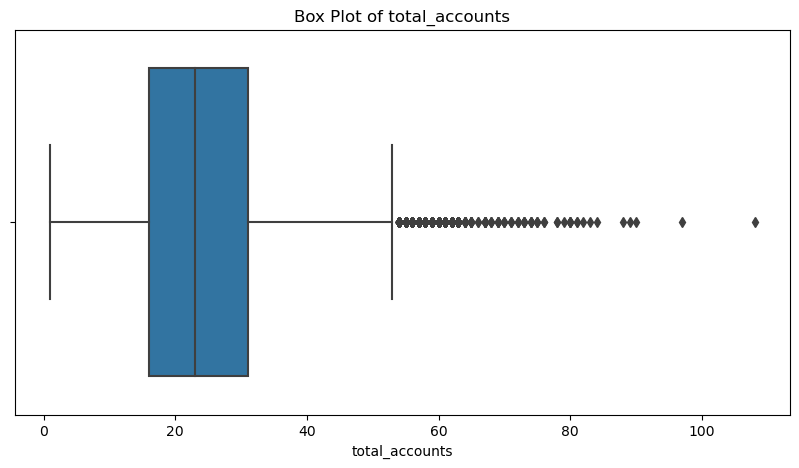

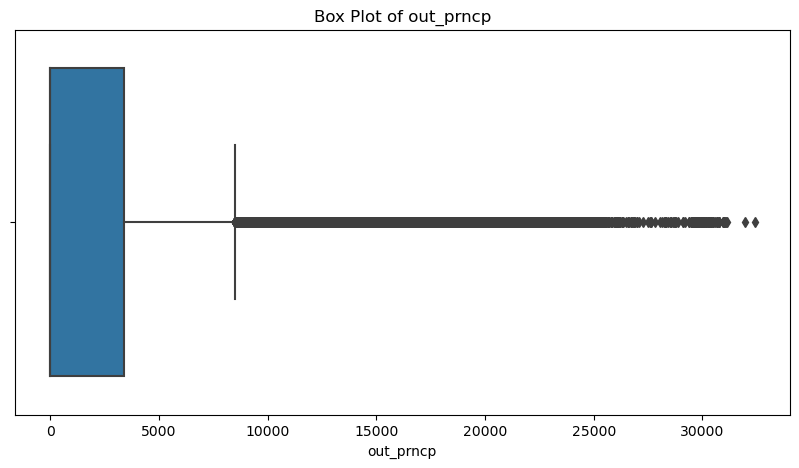

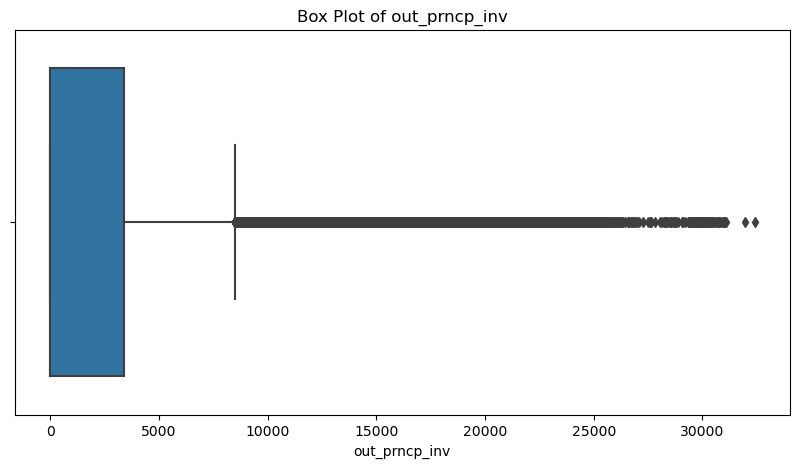

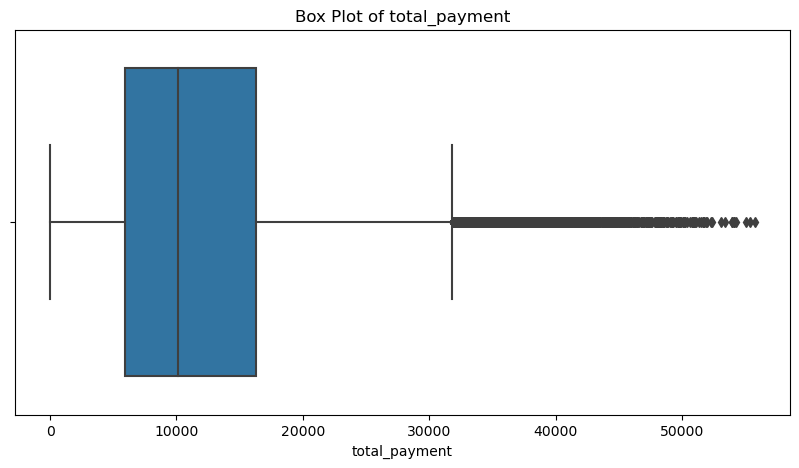

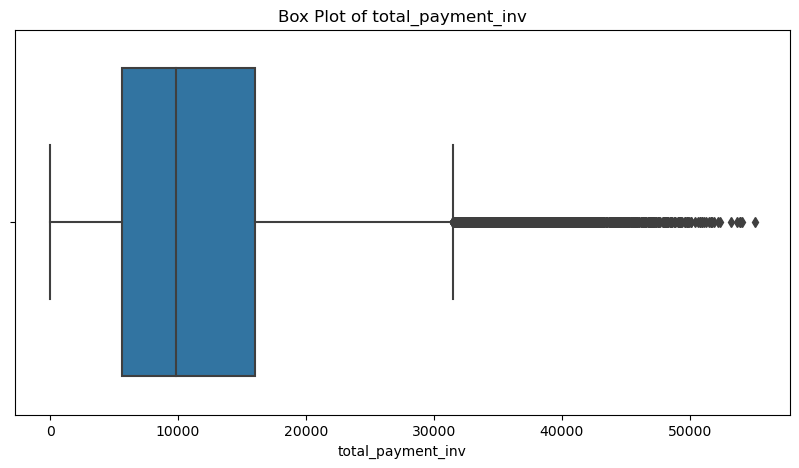

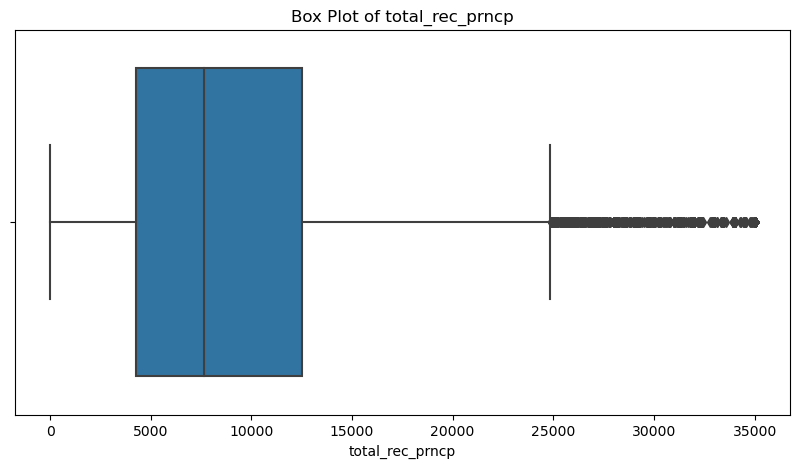

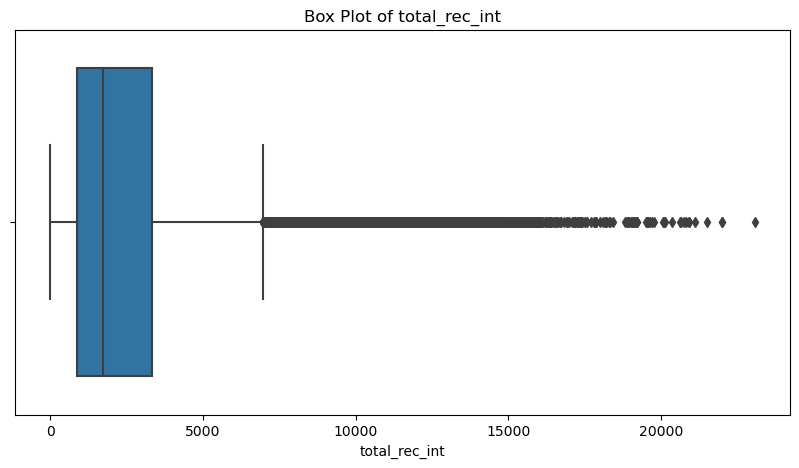

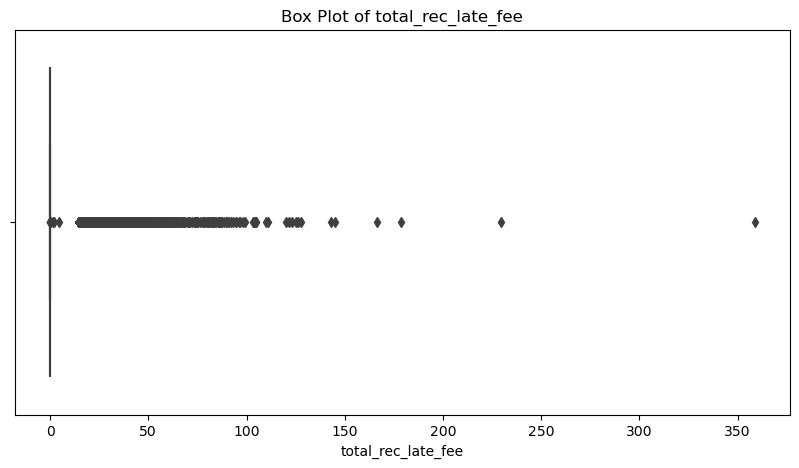

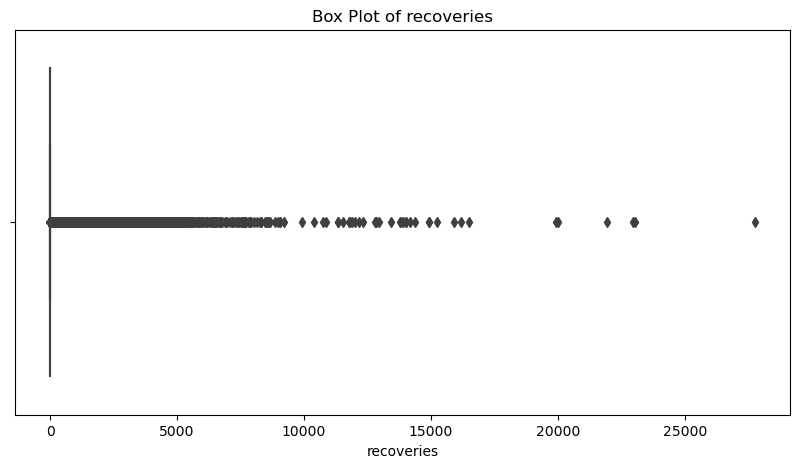

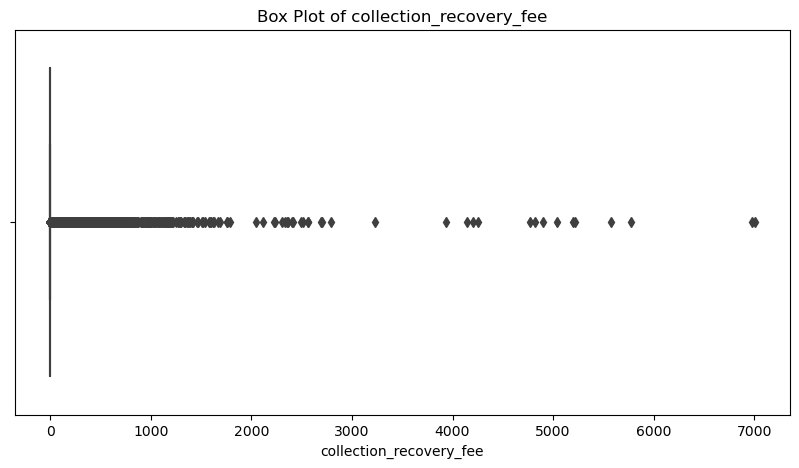

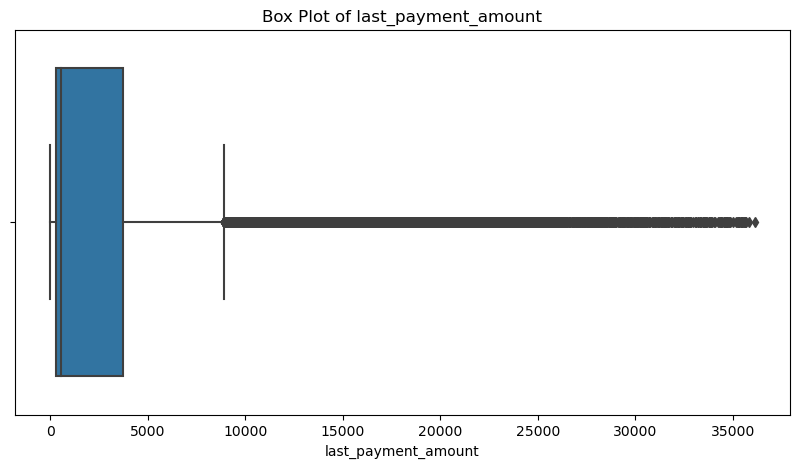

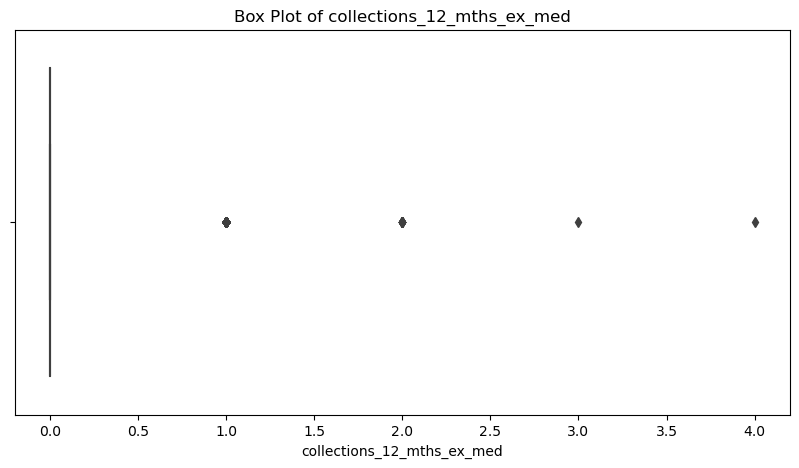

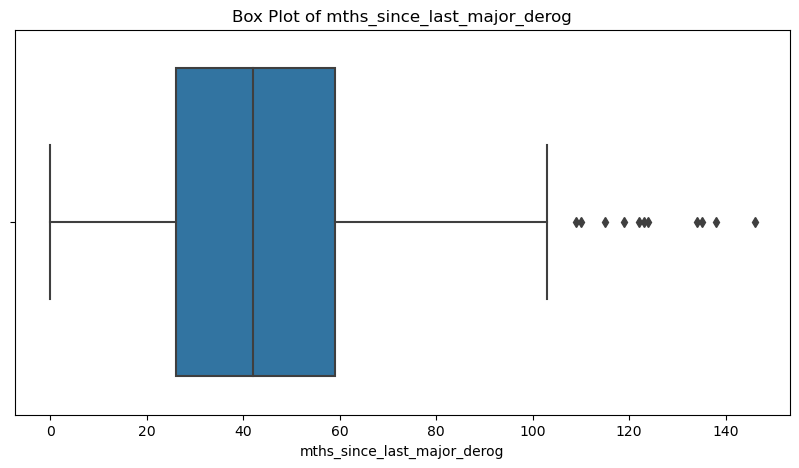

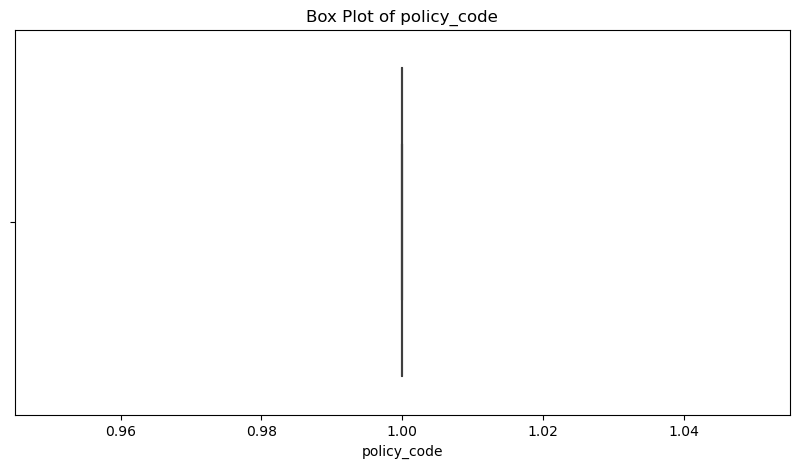

In [38]:
print("Generating box plots after outlier removal...")
plotter.plot_all_boxplots()

id: Lower Bound = -11392342.25, Upper Bound = 21012391.75
member_id: Lower Bound = -12870100.0, Upper Bound = 23894458.0
loan_amount: Lower Bound = -9500.0, Upper Bound = 34500.0
funded_amount: Lower Bound = -8000.0, Upper Bound = 32000.0
funded_amount_inv: Lower Bound = -8812.5, Upper Bound = 31687.5
int_rate: Lower Bound = 1.325000000000001, Upper Bound = 25.125
instalment: Lower Bound = -212.62000000000006, Upper Bound = 929.5400000000001
annual_inc: Lower Bound = -17000.0, Upper Bound = 143000.0
dti: Lower Bound = -6.174999999999995, Upper Bound = 37.544999999999995
delinq_2yrs: Lower Bound = 0.0, Upper Bound = 0.0
inq_last_6mths: Lower Bound = -1.5, Upper Bound = 2.5
mths_since_last_delinq: Lower Bound = -7.5, Upper Bound = 100.5
mths_since_last_record: Lower Bound = -80.0, Upper Bound = 208.0
open_accounts: Lower Bound = -0.5, Upper Bound = 19.5
total_accounts: Lower Bound = -6.0, Upper Bound = 50.0
out_prncp: Lower Bound = -2280.02625, Upper Bound = 3800.04375
out_prncp_inv: Low

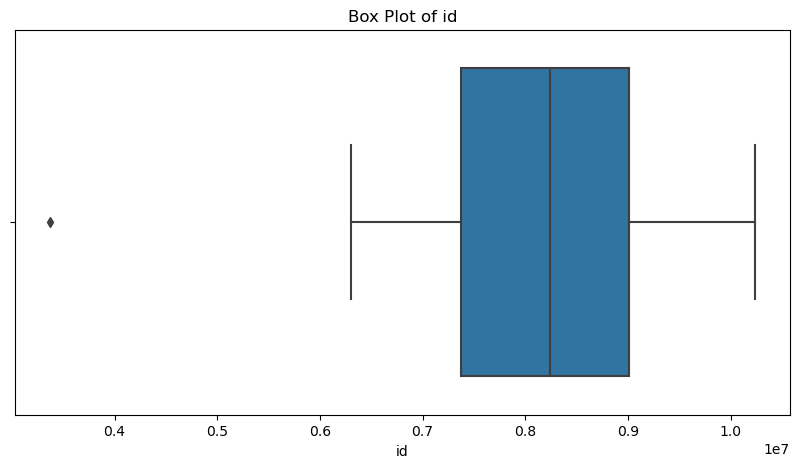

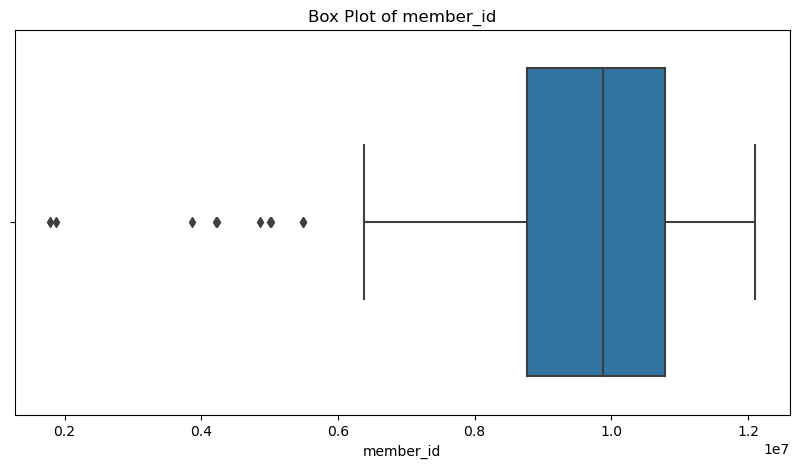

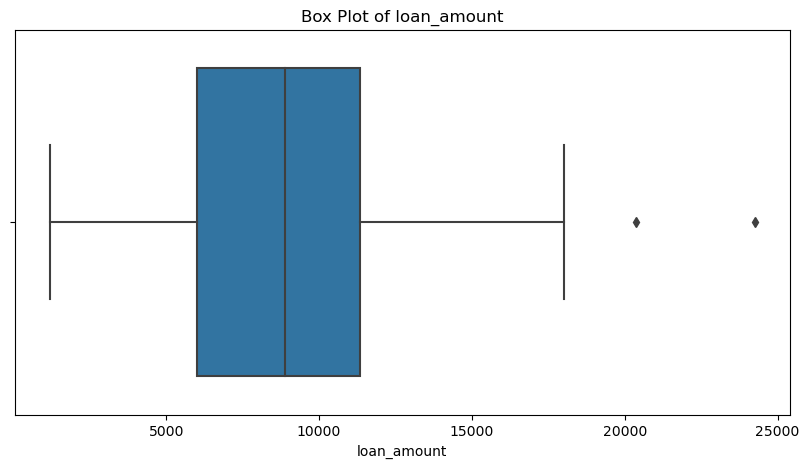

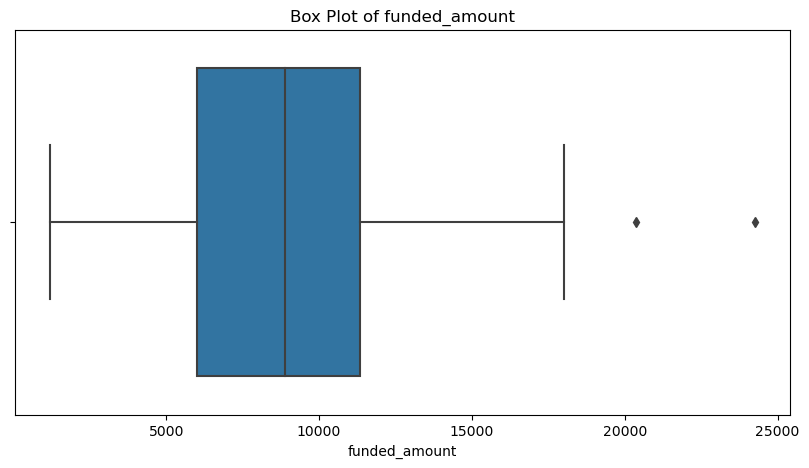

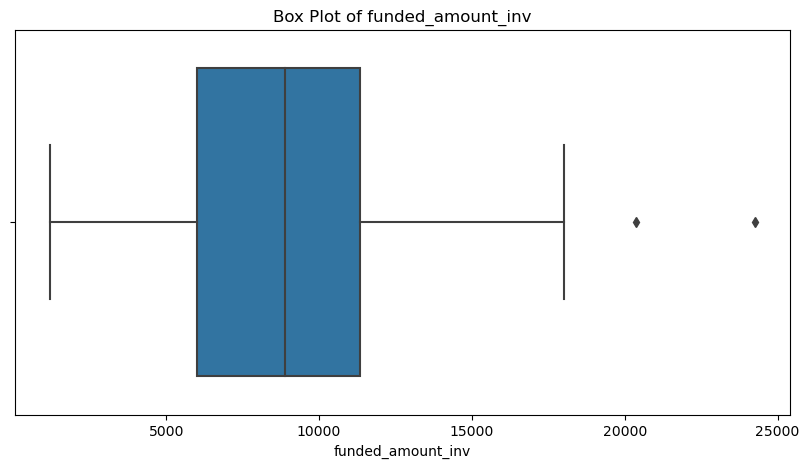

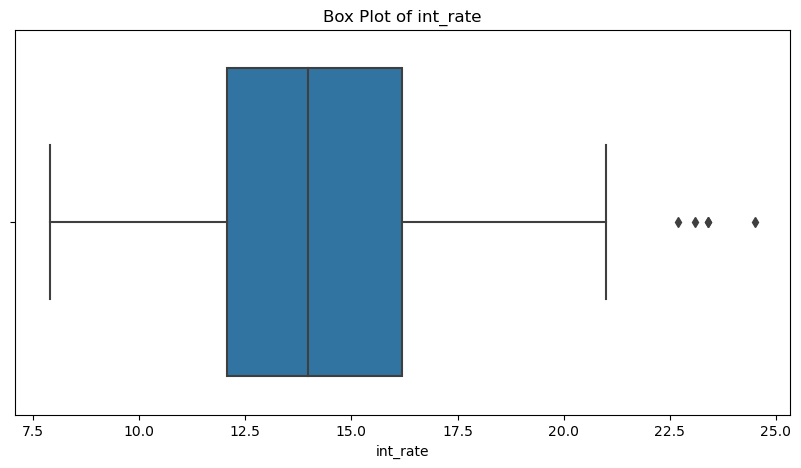

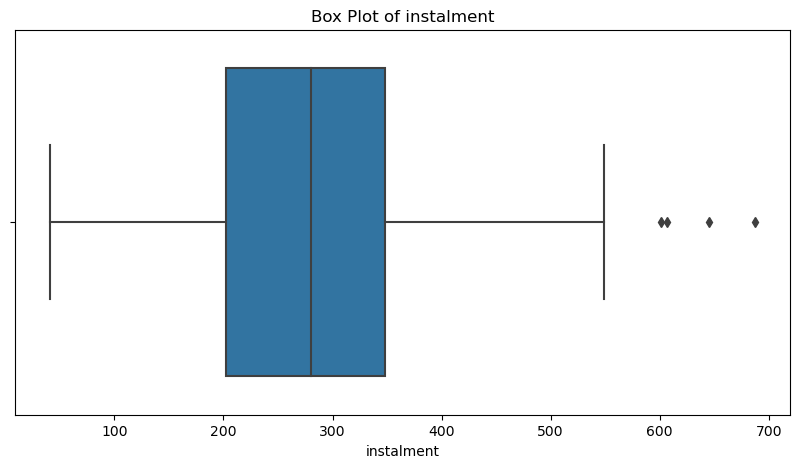

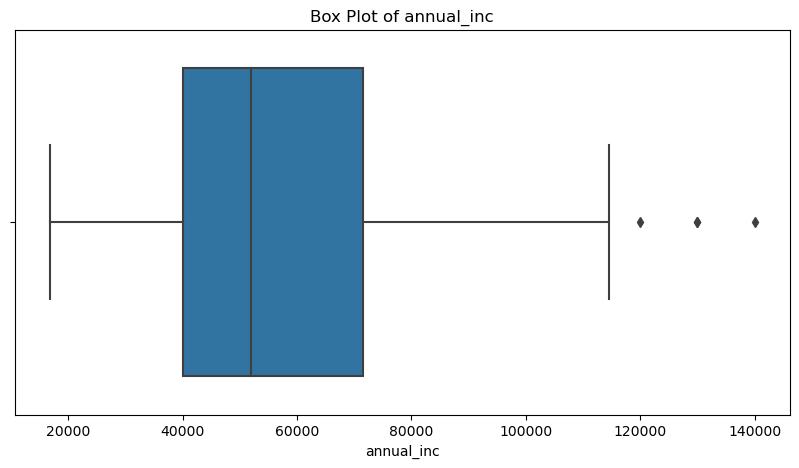

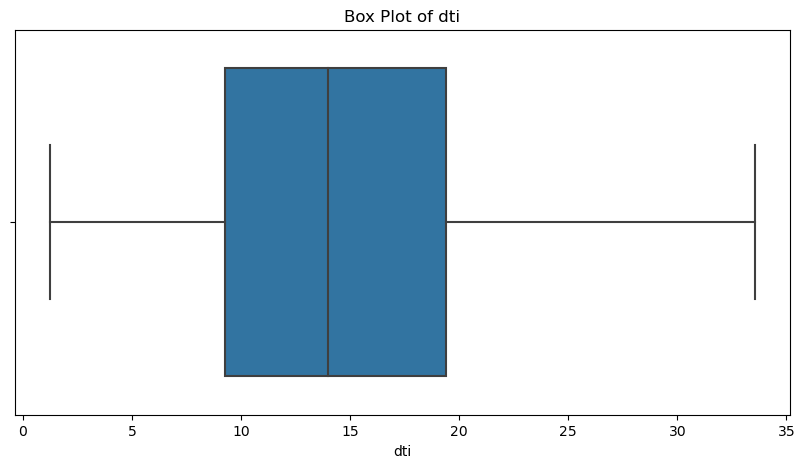

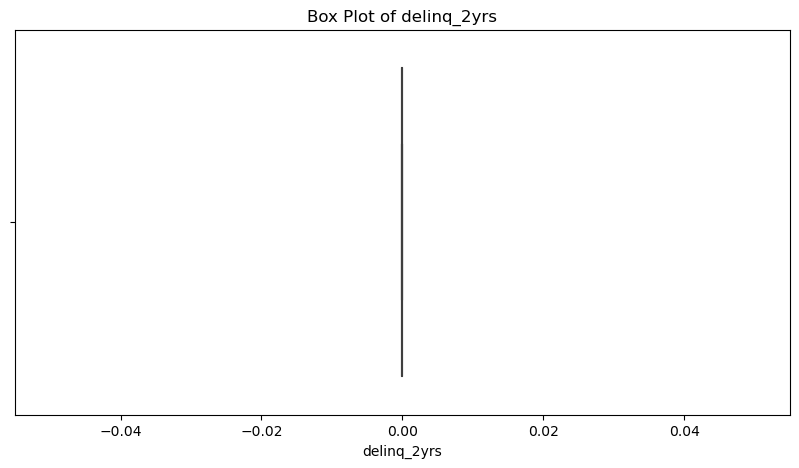

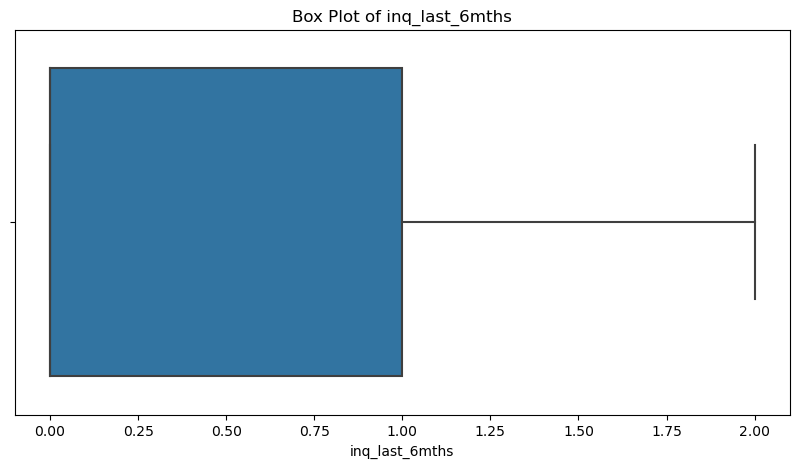

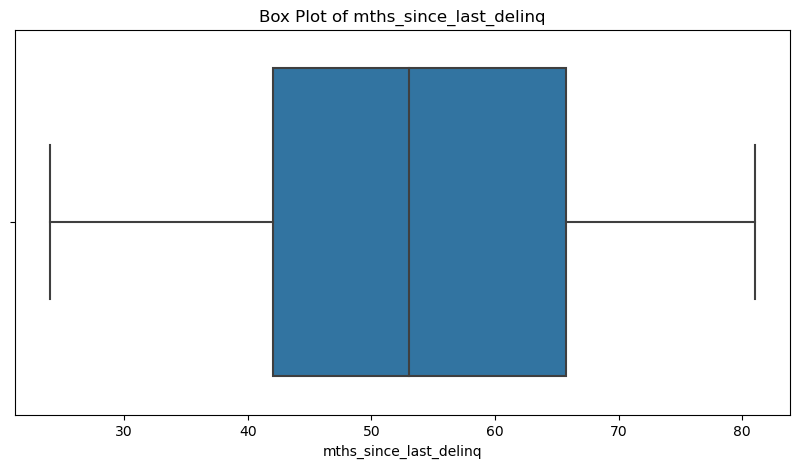

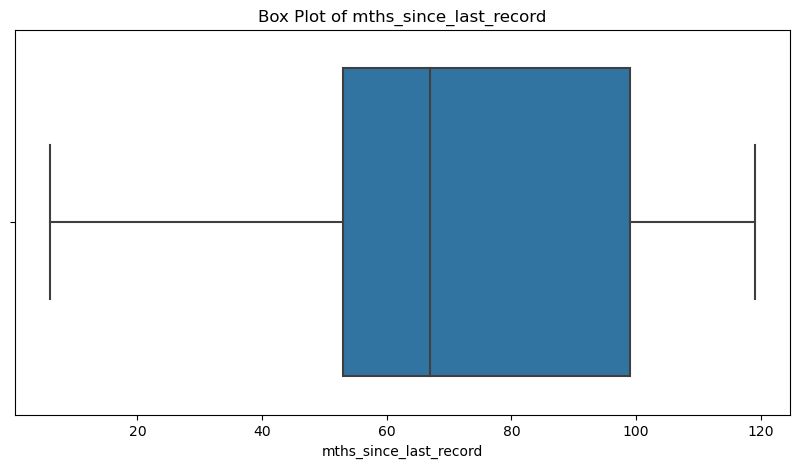

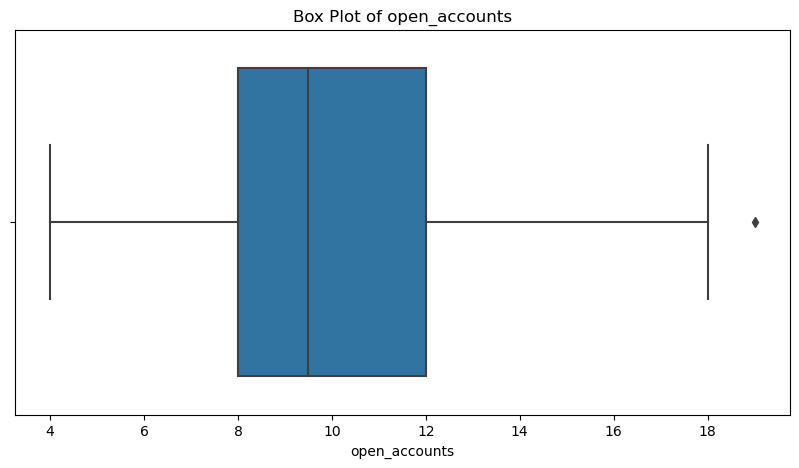

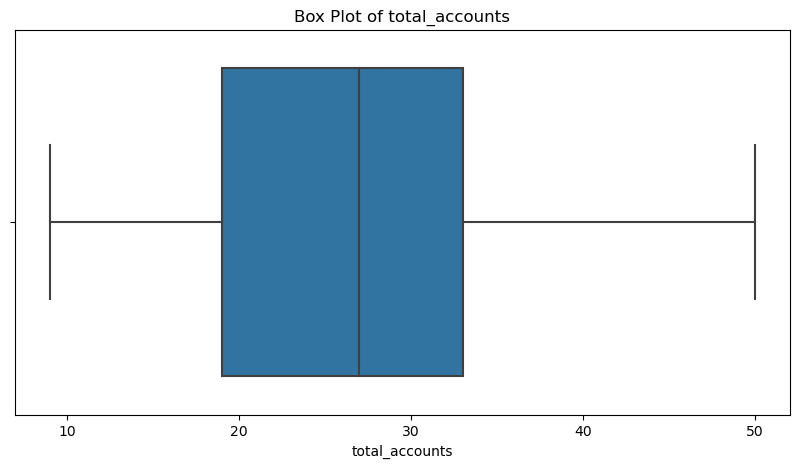

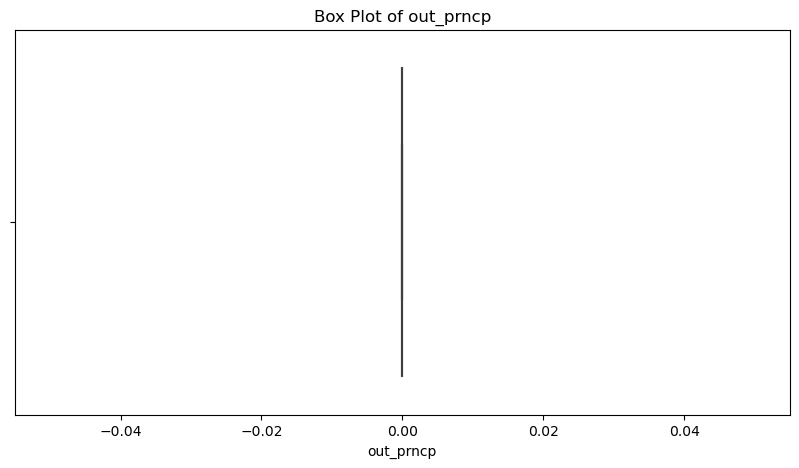

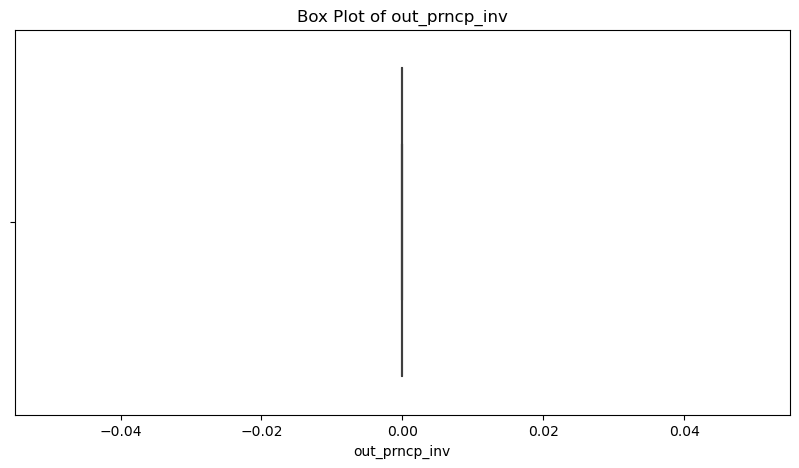

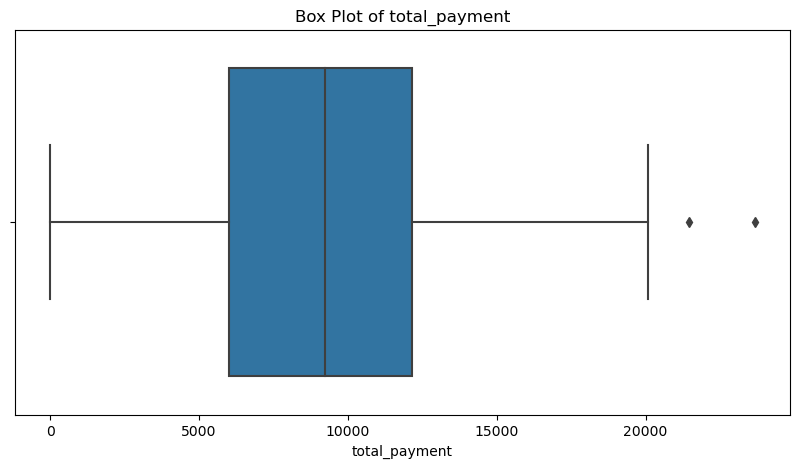

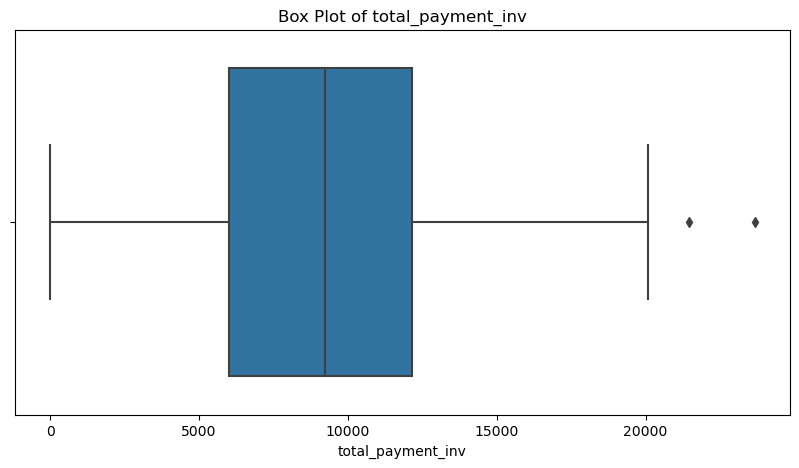

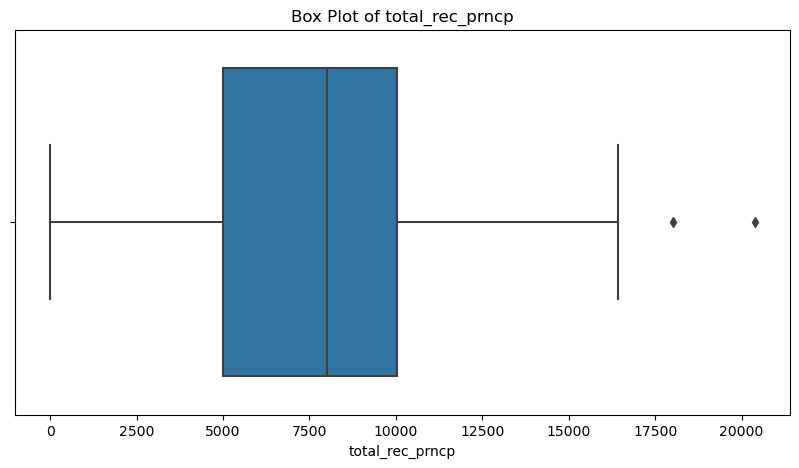

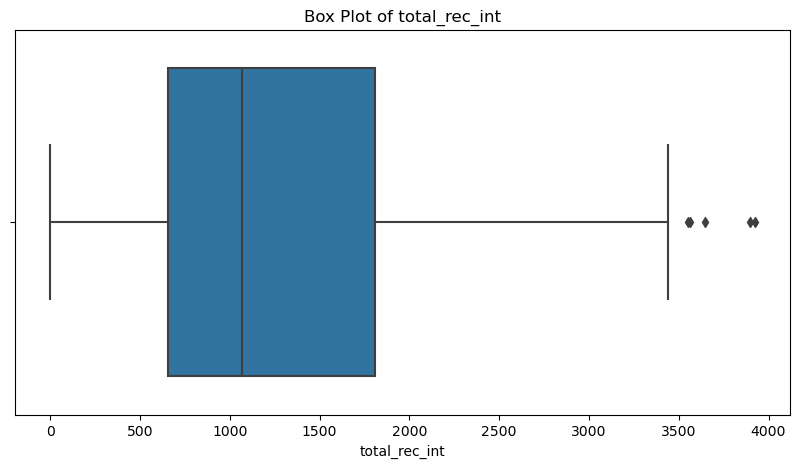

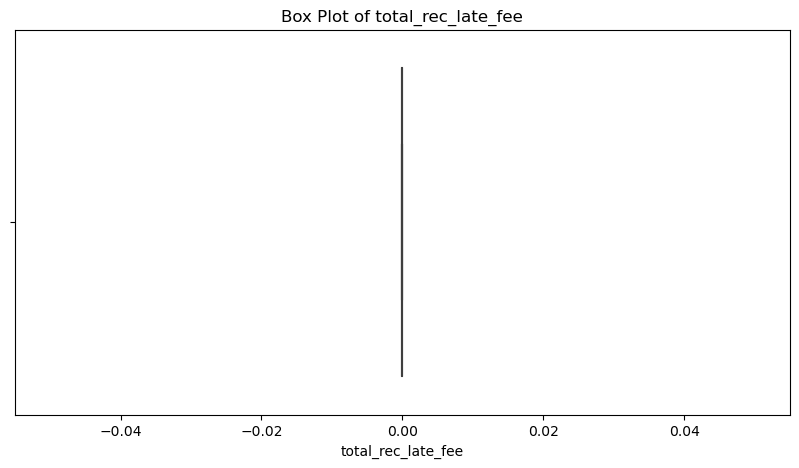

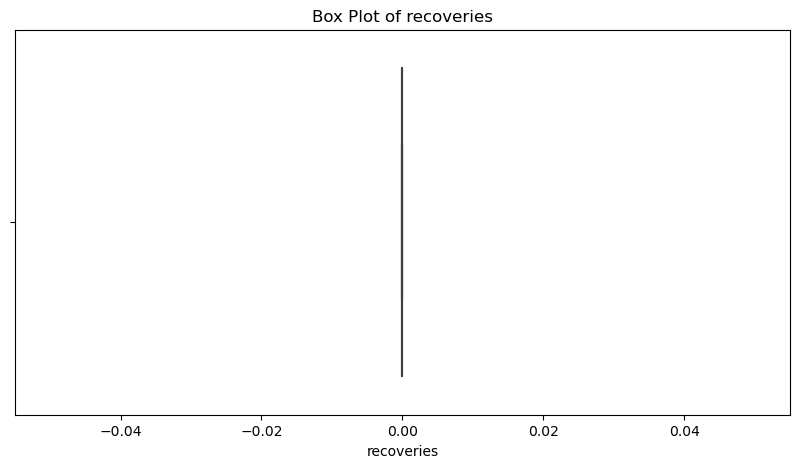

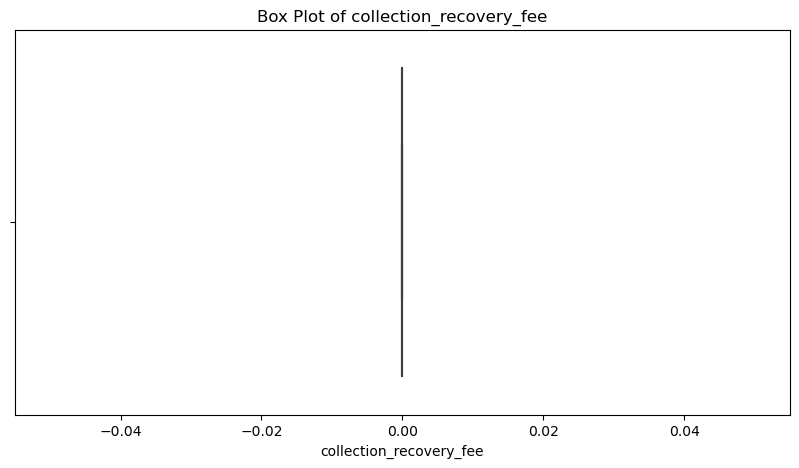

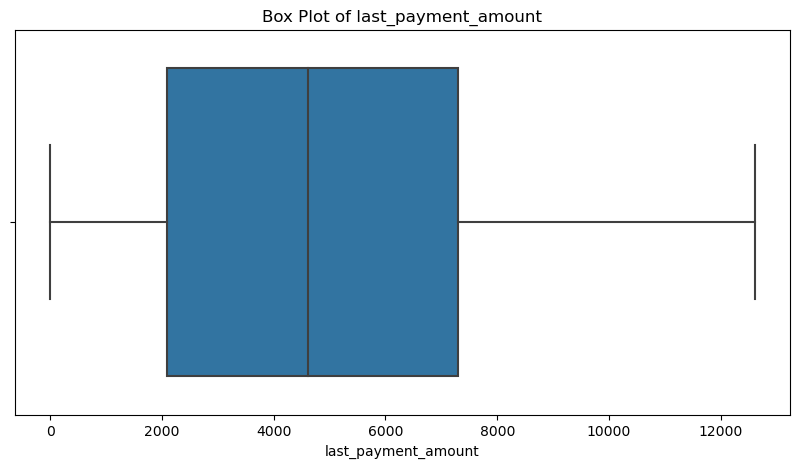

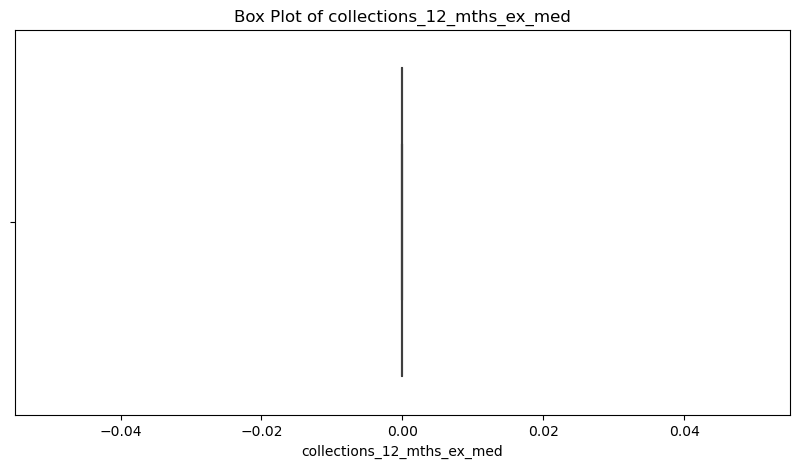

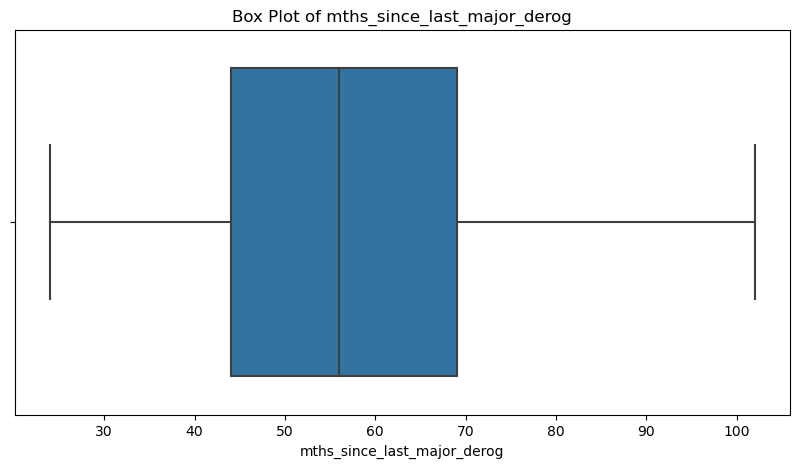

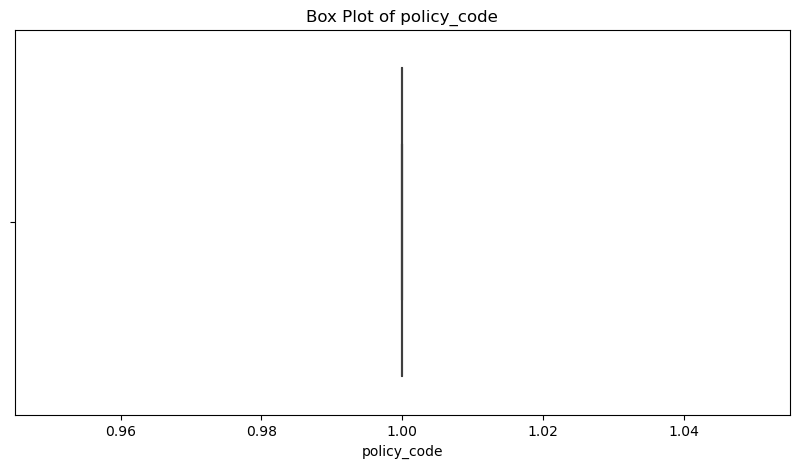

In [10]:
import pandas as pd
from data_analysis import DataFrameTransform
from data_analysis import Plotter

# Load data into a DataFrame
data_frame = pd.read_csv('loan_payments.csv')

# Initialise the class
df_transform = DataFrameTransform(data_frame)

# Using updated_plotter a new instance of the Plotter class to pass the new version of the dataset whose outliers have been removed

# Removes outliers
df_transform.remove_outliers_iqr()

# Creates a new instance of the Plotter class with the updated DataFrame
updated_plotter = Plotter(df_transform.df)

# Plots all boxplots
updated_plotter.plot_all_boxplots()